In [203]:
import pandas as pd
df= pd.read_csv("uber.csv")


## Converting the longitude / latitude for kilometeres


### Filtering the distances


### Calculing the distances 

In [206]:
import pandas as pd
import math
import matplotlib as plt

def haversine(row):
    R = 6371
    
    lat1, lon1, lat2, lon2 = map(math.radians, [row['pickup_latitude'], row['pickup_longitude'],
                                                row['dropoff_latitude'], row['dropoff_longitude']])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    
    return R * c

df['distance_km'] = df.apply(haversine, axis=1)

df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,16382965,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,27804658,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,20259894,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1,3.539715


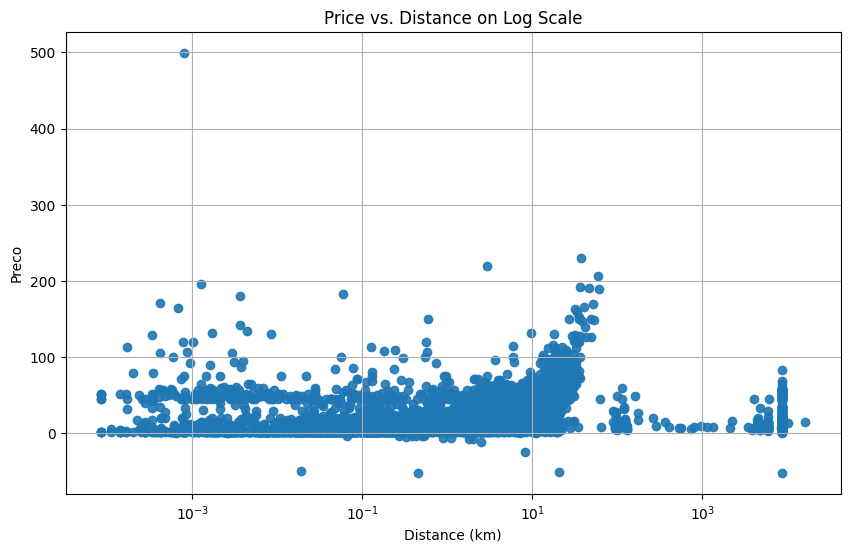

In [210]:
import matplotlib.pyplot as plt
import pandas as pd  

plt.figure(figsize=(10, 6)) 
plt.scatter(df['distance_km'], df['fare_amount'], alpha=0.9) 
plt.title('Price vs. Distance on Log Scale') 


plt.xlabel('Distance (km)')
plt.ylabel('Preco')
plt.grid(True) 
plt.xscale('log')
plt.show()  




In [8]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000,199999.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,20.855350
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997,382.964642
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120992
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000,3.875169
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135


In [9]:
df=df.drop(columns=['key'])


In [10]:
print(df.columns)
df=df.drop(columns=['Unnamed: 0'])


Index(['Unnamed: 0', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance_km'],
      dtype='object')


In [11]:
print(df.columns)

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'distance_km'],
      dtype='object')


In [12]:
df.loc[df['distance_km']> 8000]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
346,15.50,2015-03-05 19:15:07 UTC,0.000000,0.000000,-73.979805,40.786030,1,8666.398012
1067,52.00,2014-02-02 22:27:00 UTC,-73.781095,40.645015,0.000000,0.000000,1,8647.035598
1526,2.50,2014-05-12 12:00:15 UTC,-74.001849,40.715156,0.000000,0.000000,3,8666.772408
2547,10.10,2011-09-20 21:08:00 UTC,0.000000,0.000000,-73.953210,40.803528,2,8664.556728
3045,15.00,2013-03-26 02:25:17 UTC,0.000000,0.000000,-73.843777,40.739255,1,8654.176917
...,...,...,...,...,...,...,...,...
196674,4.50,2011-03-07 09:20:04 UTC,0.000000,0.000000,-73.987461,40.741804,1,8666.125840
196967,57.33,2014-09-17 09:40:30 UTC,0.000000,0.000000,-73.789045,40.655135,2,8647.904025
197468,6.90,2011-02-23 19:42:00 UTC,0.000000,0.000000,-73.980827,40.747133,5,8665.685612
197863,7.00,2014-11-18 22:10:03 UTC,-73.962190,40.759158,0.000000,0.000000,1,8664.389119


### Filtering the data by hour, so, before 06:00 - 12:00 am, 12:00pm - 18:00, 18:00 - 00:00, 00:00 - 06:00

#### Filtered 06:00 - 12:00


In [13]:
df['datetime'] = pd.to_datetime(df['pickup_datetime'])

time_start = pd.to_datetime('06:00:00').time()
time_end = pd.to_datetime('12:00:00').time()


filtered_df_morning = df[(df['datetime'].dt.time >= time_start) & (df['datetime'].dt.time <= time_end)]
filtered_df_morning=filtered_df_morning.drop(columns=['pickup_datetime'])
filtered_df_morning

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,datetime
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009-06-26 08:22:21+00:00
6,24.50,-73.961447,40.693965,-73.871195,40.774297,5,11.731015,2014-10-12 07:04:00+00:00
8,9.70,-73.975187,40.745767,-74.002720,40.743537,1,2.332711,2012-02-17 09:32:00+00:00
13,10.90,-73.953352,40.767382,-73.972510,40.796137,1,3.581251,2011-06-25 11:19:00+00:00
15,9.70,-73.990718,40.751920,-73.973053,40.744230,2,1.716277,2012-02-21 09:33:00+00:00
...,...,...,...,...,...,...,...,...
199982,57.33,-73.969204,40.754771,-73.790351,40.643802,1,19.483047,2014-08-06 11:06:06+00:00
199986,12.00,-73.964772,40.760174,-73.996794,40.763152,1,2.717229,2013-09-07 09:54:32+00:00
199989,8.90,-73.969152,40.790982,-73.967073,40.766705,1,2.705149,2010-02-18 07:12:00+00:00
199991,17.50,-73.981453,40.743919,-74.013908,40.712635,1,4.424986,2015-06-08 10:49:14+00:00


#### Filtered 12:00 - 18:00

In [14]:
time_start = pd.to_datetime('12:00:00').time()
time_end = pd.to_datetime('18:00:00').time()


filtered_df_afternoon = df[(df['datetime'].dt.time >= time_start) & (df['datetime'].dt.time <= time_end)]
filtered_df_afternoon=filtered_df_afternoon.drop(columns=['pickup_datetime'])
filtered_df_afternoon


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,datetime
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014-08-28 17:47:00+00:00
7,2.5,0.000000,0.000000,0.000000,0.000000,1,0.000000,2012-12-11 13:52:00+00:00
10,6.5,-73.974388,40.746952,-73.988586,40.729805,1,2.250858,2015-05-22 17:32:27+00:00
12,3.3,-73.966378,40.804440,-73.965890,40.807133,5,0.302252,2011-05-17 14:03:00+00:00
20,10.5,-73.980022,40.745990,-74.003432,40.759667,1,2.490244,2014-02-18 14:26:00+00:00
...,...,...,...,...,...,...,...,...
199984,9.0,-73.988243,40.759258,-73.972778,40.755070,1,1.383334,2015-06-08 12:34:33+00:00
199985,24.0,-74.005089,40.737301,-73.945290,40.774162,5,6.493880,2015-04-18 15:16:06+00:00
199992,8.9,-74.003548,40.714045,-73.991053,40.684500,1,3.449991,2010-01-30 16:24:00+00:00
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1,1.122878,2014-01-31 14:42:00+00:00


#### Filtered 18:00 - 00:00

In [15]:
time_start = pd.to_datetime('18:00:00').time()
time_end = pd.to_datetime('23:59:59').time()


filtered_df_night = df[(df['datetime'].dt.time >= time_start) & (df['datetime'].dt.time <= time_end)]
filtered_df_night=filtered_df_night.drop(columns=['pickup_datetime'])
filtered_df_night


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,datetime
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015-05-07 19:52:06+00:00
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009-07-17 20:04:56+00:00
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009-08-24 21:45:00+00:00
9,12.5,-74.001065,40.741787,-73.963040,40.775012,1,4.889417,2012-03-29 19:06:00+00:00
11,8.5,0.000000,0.000000,0.000000,0.000000,1,0.000000,2011-05-23 22:15:00+00:00
...,...,...,...,...,...,...,...,...
199977,43.5,-73.996671,40.737483,-73.867758,40.897563,1,20.845322,2012-11-20 21:04:30+00:00
199979,6.0,-73.975209,40.752767,-73.963186,40.757905,2,1.162745,2014-06-08 21:38:43+00:00
199981,9.0,-73.980445,40.761823,-73.954004,40.784407,1,3.356153,2014-06-02 21:51:50+00:00
199990,12.0,-73.987106,40.741894,-73.952240,40.772957,1,4.533744,2015-05-24 22:05:56+00:00


#### Filtered 00:00 - 06:00

In [16]:
time_start = pd.to_datetime('00:00:01').time()
time_end = pd.to_datetime('06:00:00').time()


filtered_df_dawn = df[(df['datetime'].dt.time >= time_start) & (df['datetime'].dt.time <= time_end)]
filtered_df_dawn=filtered_df_dawn.drop(columns=['pickup_datetime'])
filtered_df_dawn

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,datetime
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1,0.000000,2011-02-12 02:27:09+00:00
19,4.9,-73.992075,40.719633,-73.985323,40.727405,1,1.034704,2009-08-08 00:20:00+00:00
22,4.1,-74.010798,40.726085,-74.009767,40.737402,2,1.261388,2009-11-26 02:58:00+00:00
29,7.3,-73.971075,40.787833,-73.944957,40.784302,5,2.233696,2011-12-24 02:52:00+00:00
35,8.1,-73.988690,40.751273,-73.958810,40.764643,3,2.923020,2009-06-05 05:35:00+00:00
...,...,...,...,...,...,...,...,...
199987,8.5,-73.987260,40.725714,-74.006316,40.739611,2,2.228447,2011-04-30 00:09:16+00:00
199988,3.7,-73.988674,40.739342,-73.990730,40.738980,1,0.177836,2011-10-09 02:02:40+00:00
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1.875050,2014-03-14 01:09:00+00:00
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,12.850319,2009-06-29 00:42:00+00:00


### Compararing the prices for each part of the day


In [17]:
import matplotlib.pyplot as plt

filtered_df_morning['hour']=filtered_df_morning['datetime'].dt.hour





In [18]:
filtered_df_afternoon['hour']=filtered_df_afternoon['datetime'].dt.hour


In [19]:
filtered_df_night['hour']=filtered_df_night['datetime'].dt.hour


In [20]:
filtered_df_dawn['hour']=filtered_df_dawn['datetime'].dt.hour


### Compararing the prices / distance for 06:00 - 12:00 
#### As the price do not increase for the number of people entering in the car, we can drop the column, cause it will not affect in our results
#### And filter just what will affect on the price of the ride


In [21]:
filtered_df_morning_filter=filtered_df_morning[['distance_km','fare_amount','passenger_count','datetime']]
filtered_df_morning_filter

,distance_km,fare_amount,passenger_count,datetime
3,1.661683,5.30,3,2009-06-26 08:22:21+00:00
6,11.731015,24.50,5,2014-10-12 07:04:00+00:00
8,2.332711,9.70,1,2012-02-17 09:32:00+00:00
13,3.581251,10.90,1,2011-06-25 11:19:00+00:00
15,1.716277,9.70,2,2012-02-21 09:33:00+00:00
...,...,...,...,...
199982,19.483047,57.33,1,2014-08-06 11:06:06+00:00
199986,2.717229,12.00,1,2013-09-07 09:54:32+00:00
199989,2.705149,8.90,1,2010-02-18 07:12:00+00:00
199991,4.424986,17.50,1,2015-06-08 10:49:14+00:00


In [22]:
filtered_df_afternoon_filter=filtered_df_afternoon[['distance_km','fare_amount','datetime','passenger_count']]
filtered_df_afternoon_filter

,distance_km,fare_amount,datetime,passenger_count
4,4.475450,16.0,2014-08-28 17:47:00+00:00,5
7,0.000000,2.5,2012-12-11 13:52:00+00:00,1
10,2.250858,6.5,2015-05-22 17:32:27+00:00,1
12,0.302252,3.3,2011-05-17 14:03:00+00:00,5
20,2.490244,10.5,2014-02-18 14:26:00+00:00,1
...,...,...,...,...
199984,1.383334,9.0,2015-06-08 12:34:33+00:00,1
199985,6.493880,24.0,2015-04-18 15:16:06+00:00,5
199992,3.449991,8.9,2010-01-30 16:24:00+00:00,1
199994,1.122878,12.0,2014-01-31 14:42:00+00:00,1


In [23]:
filtered_df_night_filter=filtered_df_night[['distance_km','fare_amount','datetime','passenger_count']]
filtered_df_night_filter

,distance_km,fare_amount,datetime,passenger_count
0,1.683323,7.5,2015-05-07 19:52:06+00:00,1
1,2.457590,7.7,2009-07-17 20:04:56+00:00,1
2,5.036377,12.9,2009-08-24 21:45:00+00:00,1
9,4.889417,12.5,2012-03-29 19:06:00+00:00,1
11,0.000000,8.5,2011-05-23 22:15:00+00:00,1
...,...,...,...,...
199977,20.845322,43.5,2012-11-20 21:04:30+00:00,1
199979,1.162745,6.0,2014-06-08 21:38:43+00:00,2
199981,3.356153,9.0,2014-06-02 21:51:50+00:00,1
199990,4.533744,12.0,2015-05-24 22:05:56+00:00,1


In [24]:
filtered_df_dawn_filter=filtered_df_dawn[['distance_km','fare_amount','datetime','passenger_count']]
filtered_df_dawn_filter

,distance_km,fare_amount,datetime,passenger_count
5,0.000000,4.9,2011-02-12 02:27:09+00:00,1
19,1.034704,4.9,2009-08-08 00:20:00+00:00,1
22,1.261388,4.1,2009-11-26 02:58:00+00:00,2
29,2.233696,7.3,2011-12-24 02:52:00+00:00,5
35,2.923020,8.1,2009-06-05 05:35:00+00:00,3
...,...,...,...,...
199987,2.228447,8.5,2011-04-30 00:09:16+00:00,2
199988,0.177836,3.7,2011-10-09 02:02:40+00:00,1
199996,1.875050,7.5,2014-03-14 01:09:00+00:00,1
199997,12.850319,30.9,2009-06-29 00:42:00+00:00,2


### Filtering some mismatching data

In [25]:
filtered_df_dawn['passenger_count'].value_counts()
filtered_df_night['passenger_count'].value_counts()
filtered_df_morning['passenger_count'].value_counts()


passenger_count
1      36108
2       5405
5       3263
3       1500
6       1066
4        707
0        176
208        1
Name: count, dtype: int64

In [26]:
filtered_df_morning = filtered_df_morning.drop(filtered_df_morning[filtered_df_morning['passenger_count'] == 208].index)
filtered_df_morning['passenger_count'].value_counts()

passenger_count
1    36108
2     5405
5     3263
3     1500
6     1066
4      707
0      176
Name: count, dtype: int64

In [27]:
filtered_df_dawn_filter=filtered_df_dawn_filter[filtered_df_dawn_filter['distance_km']!=0]
filtered_df_dawn_filter


,distance_km,fare_amount,datetime,passenger_count
19,1.034704,4.9,2009-08-08 00:20:00+00:00,1
22,1.261388,4.1,2009-11-26 02:58:00+00:00,2
29,2.233696,7.3,2011-12-24 02:52:00+00:00,5
35,2.923020,8.1,2009-06-05 05:35:00+00:00,3
44,0.385199,3.3,2012-07-12 00:59:02+00:00,1
...,...,...,...,...
199987,2.228447,8.5,2011-04-30 00:09:16+00:00,2
199988,0.177836,3.7,2011-10-09 02:02:40+00:00,1
199996,1.875050,7.5,2014-03-14 01:09:00+00:00,1
199997,12.850319,30.9,2009-06-29 00:42:00+00:00,2


In [28]:
filtered_df_night_filter=filtered_df_night_filter[filtered_df_night_filter['distance_km']!=0]
filtered_df_night_filter

,distance_km,fare_amount,datetime,passenger_count
0,1.683323,7.5,2015-05-07 19:52:06+00:00,1
1,2.457590,7.7,2009-07-17 20:04:56+00:00,1
2,5.036377,12.9,2009-08-24 21:45:00+00:00,1
9,4.889417,12.5,2012-03-29 19:06:00+00:00,1
14,1.309950,6.9,2010-04-06 22:20:27+00:00,1
...,...,...,...,...
199977,20.845322,43.5,2012-11-20 21:04:30+00:00,1
199979,1.162745,6.0,2014-06-08 21:38:43+00:00,2
199981,3.356153,9.0,2014-06-02 21:51:50+00:00,1
199990,4.533744,12.0,2015-05-24 22:05:56+00:00,1


In [29]:
filtered_df_morning_filter=filtered_df_morning_filter[filtered_df_morning_filter['distance_km']!=0]
filtered_df_morning_filter

,distance_km,fare_amount,passenger_count,datetime
3,1.661683,5.30,3,2009-06-26 08:22:21+00:00
6,11.731015,24.50,5,2014-10-12 07:04:00+00:00
8,2.332711,9.70,1,2012-02-17 09:32:00+00:00
13,3.581251,10.90,1,2011-06-25 11:19:00+00:00
15,1.716277,9.70,2,2012-02-21 09:33:00+00:00
...,...,...,...,...
199982,19.483047,57.33,1,2014-08-06 11:06:06+00:00
199986,2.717229,12.00,1,2013-09-07 09:54:32+00:00
199989,2.705149,8.90,1,2010-02-18 07:12:00+00:00
199991,4.424986,17.50,1,2015-06-08 10:49:14+00:00


In [30]:
filtered_df_afternoon_filter=filtered_df_afternoon_filter.sort_values('datetime',ascending=True)
filtered_df_morning_filter=filtered_df_morning_filter.sort_values('datetime',ascending=True)
filtered_df_dawn_filter=filtered_df_dawn_filter.sort_values('datetime',ascending=True)
filtered_df_night_filter=filtered_df_night_filter.sort_values('datetime',ascending=True)


### Handling with negative fare amount


In [31]:
filtered_df_afternoon_filter['fare_amount']=filtered_df_afternoon_filter['fare_amount'].abs()
filtered_df_afternoon_filter
filtered_df_afternoon_filter[filtered_df_afternoon_filter['fare_amount']<0]

,distance_km,fare_amount,datetime,passenger_count


In [32]:
filtered_df_morning_filter['fare_amount']=filtered_df_morning_filter['fare_amount'].abs()
filtered_df_dawn_filter['fare_amount']=filtered_df_dawn_filter['fare_amount'].abs()
filtered_df_night_filter['fare_amount']=filtered_df_night_filter['fare_amount'].abs()


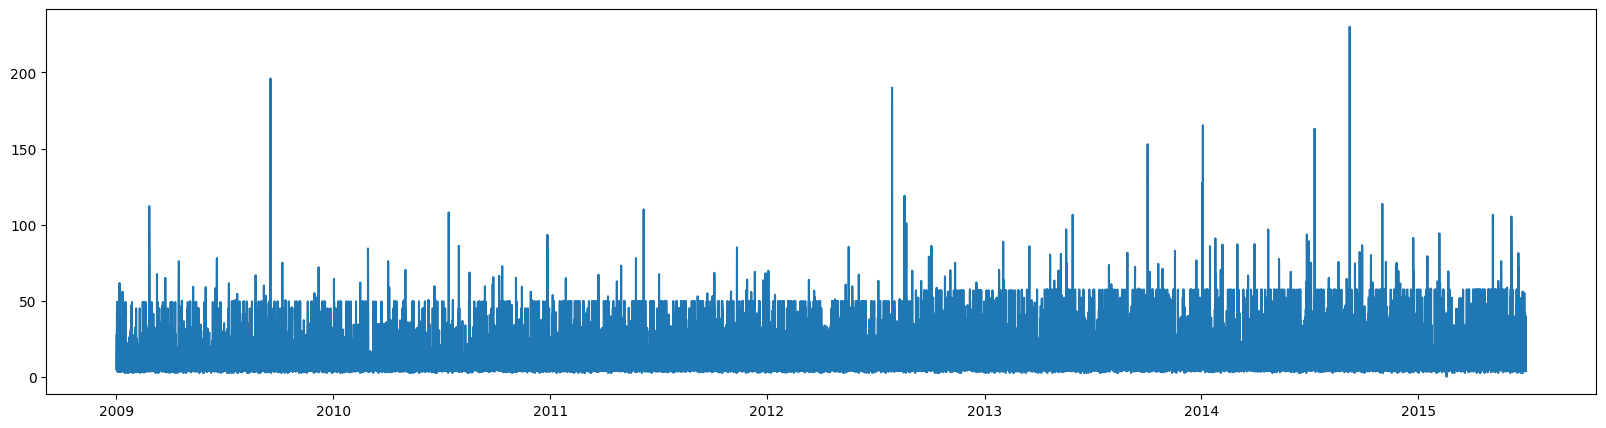

In [33]:
plt.figure(figsize=(20,5))
plt.plot(filtered_df_morning_filter['datetime'],filtered_df_morning_filter['fare_amount'])
plt.show()

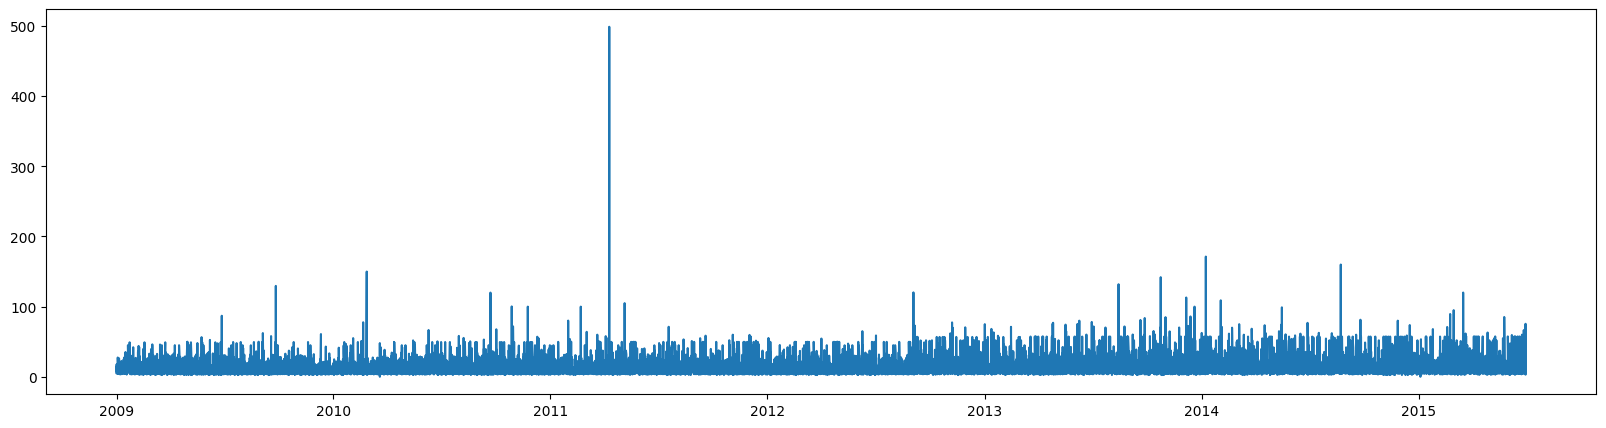

In [34]:
plt.figure(figsize=(20,5))
plt.plot(filtered_df_dawn_filter['datetime'],filtered_df_dawn_filter['fare_amount'])
plt.show()

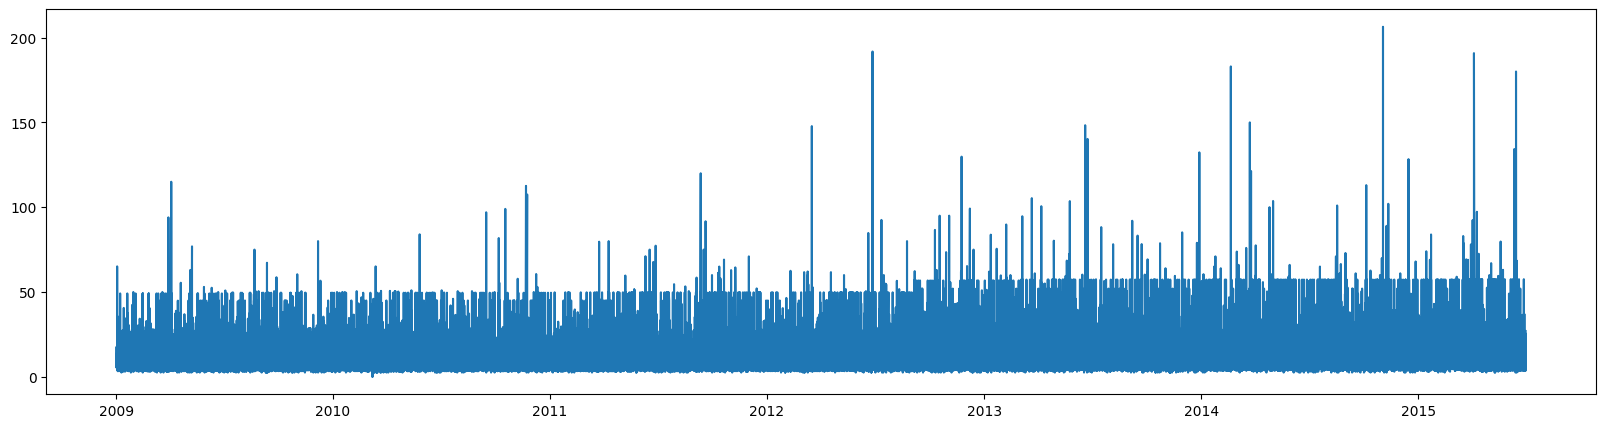

In [35]:
plt.figure(figsize=(20,5))
plt.plot(filtered_df_night_filter['datetime'],filtered_df_night_filter['fare_amount'])
plt.show()

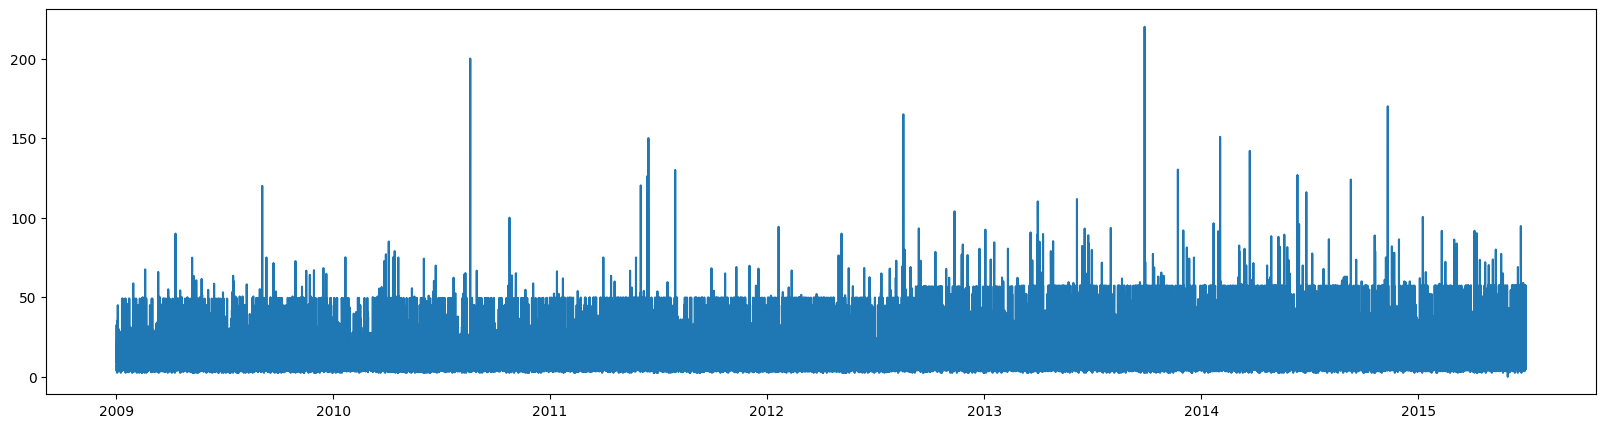

In [36]:
plt.figure(figsize=(20,5))
plt.plot(filtered_df_afternoon_filter['datetime'],filtered_df_afternoon_filter['fare_amount'])
plt.show()

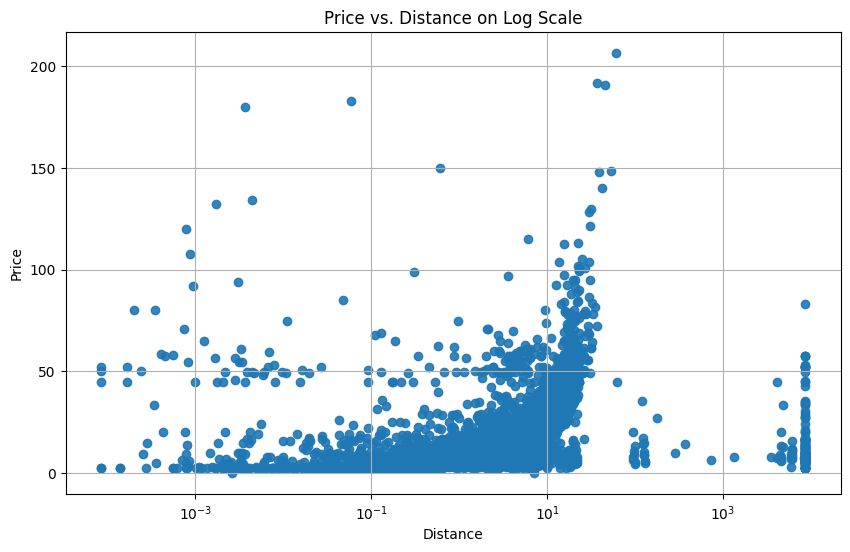

In [37]:

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_night_filter['distance_km'], filtered_df_night_filter['fare_amount'], alpha=0.9)
plt.title('Price vs. Distance on Log Scale')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xscale('log')  # Aplica escala logarítmica no eixo x
plt.grid(True)
plt.show()

### Filtering the price for km that not make sense


In [38]:

filtered_df_night_filter=filtered_df_night_filter.reset_index()


In [ ]:
filtered_df_morning_filter=filtered_df_morning_filter.reset_index()
filtered_df_afternoon_filter=filtered_df_afternoon_filter.reset_index()
filtered_df_dawn_filter=filtered_df_dawn_filter.reset_index()

In [ ]:
filtered_df_dawn_filter.drop(columns=['index'])

,distance_km,fare_amount,datetime,passenger_count
0,2.244765,8.50,2009-01-01 01:15:22+00:00,2
1,3.916842,13.00,2009-01-01 01:59:17+00:00,2
2,3.786736,10.60,2009-01-01 02:05:03+00:00,2
3,5.946957,12.20,2009-01-01 02:09:13+00:00,1
4,2.784022,11.00,2009-01-01 02:13:41+00:00,4
...,...,...,...,...
24956,9.647191,27.50,2015-06-30 01:31:06+00:00,1
24957,0.002109,75.54,2015-06-30 02:01:49+00:00,1
24958,1.169502,5.50,2015-06-30 02:14:12+00:00,1
24959,1.747834,7.50,2015-06-30 04:59:22+00:00,2


In [ ]:
filtered_df_morning_filter.drop(columns=['index'])

,distance_km,fare_amount,passenger_count,datetime
0,8.140743,27.45,2,2009-01-01 10:11:29+00:00
1,3.743181,10.10,2,2009-01-01 10:35:00+00:00
2,1.138809,4.50,1,2009-01-01 11:46:00+00:00
3,23.094241,49.15,2,2009-01-02 06:13:38+00:00
4,2.015965,6.10,1,2009-01-02 06:44:31+00:00
...,...,...,...,...
46916,4.265180,20.00,1,2015-06-30 09:55:45+00:00
46917,1.258987,8.00,1,2015-06-30 10:55:58+00:00
46918,0.862187,4.00,1,2015-06-30 11:21:14+00:00
46919,10.112305,40.04,1,2015-06-30 11:32:53+00:00


In [ ]:
filtered_df_afternoon_filter.drop(columns=['index'])

,distance_km,fare_amount,datetime,passenger_count
0,2.678890,9.3,2009-01-01 12:03:00+00:00,1
1,9.264525,18.9,2009-01-01 12:12:00+00:00,2
2,0.407792,3.7,2009-01-01 12:18:00+00:00,1
3,4.828700,9.3,2009-01-01 12:26:00+00:00,1
4,2.681877,6.9,2009-01-01 12:33:40+00:00,1
...,...,...,...,...
55852,1.661548,7.0,2015-06-30 16:09:27+00:00,1
55853,2.462976,11.5,2015-06-30 16:23:15+00:00,1
55854,3.547580,16.0,2015-06-30 17:15:01+00:00,1
55855,3.917169,22.5,2015-06-30 17:18:12+00:00,1


In [ ]:
filtered_df_night_filter.drop(columns=['level_0','index'])


,distance_km,fare_amount,datetime,passenger_count
0,2.065646,6.5,2009-01-01 18:15:36+00:00,2
1,6.899536,17.7,2009-01-01 18:55:30+00:00,3
2,1.178621,5.7,2009-01-01 19:02:00+00:00,2
3,3.201176,7.7,2009-01-01 19:24:52+00:00,2
4,1.375591,7.7,2009-01-01 19:32:00+00:00,2
...,...,...,...,...
66739,5.610774,18.5,2015-06-30 22:57:53+00:00,2
66740,9.221233,25.5,2015-06-30 23:16:42+00:00,2
66741,5.447442,20.0,2015-06-30 23:31:06+00:00,4
66742,1.998738,8.5,2015-06-30 23:33:33+00:00,1


### Handling with nosense fare amount to certainly distance


In [ ]:
filtered_df_night_filter=filtered_df_night_filter.drop(filtered_df_night_filter[(filtered_df_night_filter['fare_amount'] > 100) & (filtered_df_night_filter['distance_km'] < 1)].index)


In [ ]:
filtered_df_morning_filter.loc[(filtered_df_morning_filter['fare_amount'] > 100) & (filtered_df_morning_filter['distance_km'] < 1)]


,index,distance_km,fare_amount,passenger_count,datetime
5096,184901,0.001259,196.00,1,2009-09-17 09:38:03+00:00
10921,163221,0.180439,108.00,1,2010-07-14 08:10:15+00:00
17477,150980,0.242336,110.00,1,2011-06-07 10:04:00+00:00
32299,51017,0.574746,106.50,1,2013-05-29 06:37:27+00:00
42490,2053,0.127635,113.66,1,2014-11-01 08:42:39+00:00
46520,129041,0.002970,105.29,1,2015-06-06 11:46:58+00:00


In [ ]:
filtered_df_morning_filter=filtered_df_morning_filter.drop(filtered_df_morning_filter[(filtered_df_morning_filter['fare_amount'] > 100) & (filtered_df_morning_filter['distance_km'] < 1)].index)


In [ ]:
filtered_df_morning_filter.loc[(filtered_df_morning_filter['fare_amount'] > 100) & (filtered_df_morning_filter['distance_km'] < 1)]


,index,distance_km,fare_amount,passenger_count,datetime


In [ ]:
filtered_df_dawn_filter.loc[(filtered_df_dawn_filter['fare_amount'] > 100) & (filtered_df_dawn_filter['distance_km'] < 1)]


,index,distance_km,fare_amount,datetime,passenger_count
2817,141123,0.000334,129.57,2009-09-26 00:59:00+00:00,1
6543,155062,0.001029,120.00,2010-09-22 05:59:00+00:00,1
6892,166885,0.543552,100.30,2010-10-28 00:44:00+00:00,5
8623,170081,0.000790,499.00,2011-04-10 04:10:00+00:00,1
8926,5968,0.000420,105.00,2011-05-06 00:40:00+00:00,1
18719,183943,0.003691,142.00,2013-10-24 03:36:40+00:00,1
19209,11301,0.000169,113.00,2013-12-06 02:17:00+00:00,2
19574,53996,0.000418,171.35,2014-01-08 01:09:06+00:00,1


In [ ]:
filtered_df_dawn_filter=filtered_df_dawn_filter.drop(filtered_df_dawn_filter[(filtered_df_dawn_filter['fare_amount'] > 100) & (filtered_df_dawn_filter['distance_km'] < 1)].index)


In [ ]:
filtered_df_dawn_filter.loc[(filtered_df_dawn_filter['fare_amount'] > 100) & (filtered_df_dawn_filter['distance_km'] < 1)]


,index,distance_km,fare_amount,datetime,passenger_count


In [ ]:
filtered_df_afternoon_filter.loc[(filtered_df_afternoon_filter['fare_amount'] > 100) & (filtered_df_afternoon_filter['distance_km'] < 1)]


,index,distance_km,fare_amount,datetime,passenger_count
20877,15362,0.559508,120.3,2011-06-02 15:17:13+00:00,2
22242,114940,0.008493,130.0,2011-07-30 14:03:42+00:00,1
31604,188234,0.000682,165.0,2012-08-17 12:36:08+00:00,1


In [ ]:
filtered_df_afternoon_filter=filtered_df_afternoon_filter.drop(filtered_df_afternoon_filter[(filtered_df_afternoon_filter['fare_amount'] > 100) & (filtered_df_afternoon_filter['distance_km'] < 1)].index)


In [ ]:
filtered_df_afternoon_filter.loc[(filtered_df_afternoon_filter['fare_amount'] > 100) & (filtered_df_afternoon_filter['distance_km'] < 1)]


,index,distance_km,fare_amount,datetime,passenger_count


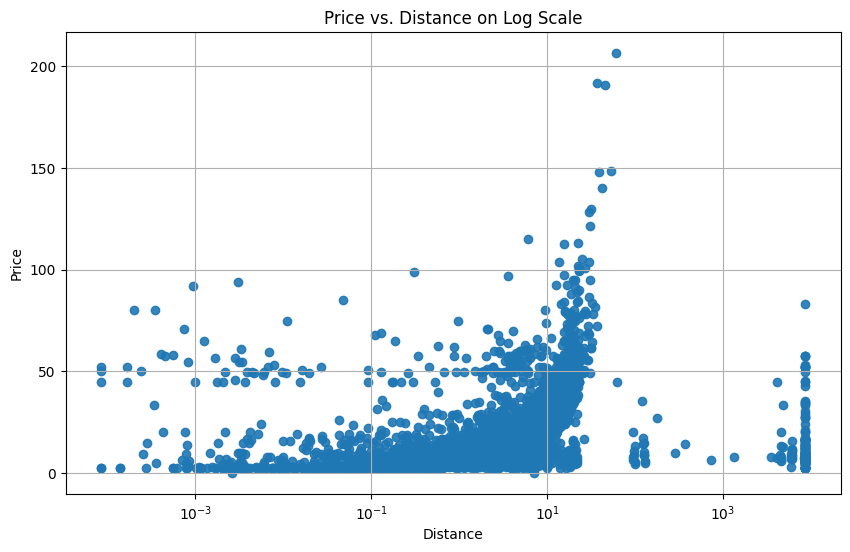

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_night_filter['distance_km'], filtered_df_night_filter['fare_amount'], alpha=0.9)
plt.title('Price vs. Distance on Log Scale')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xscale('log')  # Aplica escala logarítmica no eixo x
plt.grid(True)
plt.show()

In [ ]:
filtered_df_afternoon_filter.loc[(filtered_df_afternoon_filter['fare_amount'] > 100)]
filtered_df_night_filter.loc[(filtered_df_night_filter['fare_amount'] > 100)]
filtered_df_morning_filter.loc[(filtered_df_morning_filter['fare_amount'] > 100)]
filtered_df_dawn_filter.loc[(filtered_df_dawn_filter['fare_amount'] > 100)]



,index,distance_km,fare_amount,datetime,passenger_count
4391,159901,35.974852,150.00,2010-02-26 00:59:26+00:00,1
14305,190767,35.825692,120.30,2012-09-03 00:21:00+00:00,3
17933,95337,9.702502,131.93,2013-08-14 05:01:45+00:00,1
19841,196616,25.341578,109.00,2014-02-02 04:43:45+00:00,2
21945,145249,33.598858,160.00,2014-08-23 03:18:09+00:00,1
23943,15461,32.070607,120.08,2015-03-17 02:33:09+00:00,2


In [ ]:
filtered_df_afternoon_filter=filtered_df_afternoon_filter.drop(filtered_df_afternoon_filter[(filtered_df_afternoon_filter['distance_km']> 8000)].index)
filtered_df_morning_filter=filtered_df_morning_filter.drop(filtered_df_morning_filter[(filtered_df_morning_filter['distance_km'] > 8000)].index)
filtered_df_night_filter=filtered_df_night_filter.drop(filtered_df_night_filter[(filtered_df_night_filter['distance_km'] > 8000)].index)
filtered_df_dawn_filter=filtered_df_dawn_filter.drop(filtered_df_dawn_filter[(filtered_df_dawn_filter['distance_km'] > 8000)].index)


In [ ]:
filtered_df_afternoon_filter.loc[filtered_df_afternoon_filter['distance_km']>1000]
filtered_df_morning_filter.loc[filtered_df_morning_filter['distance_km']>1000]
filtered_df_dawn_filter.loc[filtered_df_dawn_filter['distance_km']>1000]

filtered_df_night_filter.loc[filtered_df_night_filter['distance_km']>1000]


,level_0,index,distance_km,fare_amount,datetime,passenger_count
5951,5951,40908,3487.793779,8.1,2009-07-30 19:51:48+00:00,1
21695,21695,72518,4079.186783,7.3,2011-02-25 21:50:00+00:00,1
27166,27166,138075,6020.967777,2.9,2011-09-05 19:28:00+00:00,1
28368,28368,103745,4773.694612,12.9,2011-10-14 19:04:00+00:00,1
28670,28670,113876,4461.127769,8.9,2011-10-24 20:05:00+00:00,1
29060,29060,48506,4852.352520,33.7,2011-11-05 23:26:00+00:00,1
30634,30634,133401,4068.790188,45.0,2011-12-30 20:46:00+00:00,1
31073,31073,146281,4523.262351,6.1,2012-01-15 20:37:00+00:00,1
31205,31205,130954,6027.126318,6.9,2012-01-20 18:10:00+00:00,5
31347,31347,175276,6022.958062,12.1,2012-01-24 23:03:00+00:00,5


In [ ]:
filtered_df_afternoon_filter=filtered_df_afternoon_filter.drop(filtered_df_afternoon_filter[(filtered_df_afternoon_filter['distance_km']> 1000)].index)
filtered_df_morning_filter=filtered_df_morning_filter.drop(filtered_df_morning_filter[(filtered_df_morning_filter['distance_km'] > 1000)].index)
filtered_df_night_filter=filtered_df_night_filter.drop(filtered_df_night_filter[(filtered_df_night_filter['distance_km'] > 1000)].index)
filtered_df_dawn_filter=filtered_df_dawn_filter.drop(filtered_df_dawn_filter[(filtered_df_dawn_filter['distance_km'] > 1000)].index)

#### Filtering a little more datas that not make sense


In [ ]:
filtered_df_afternoon_filter.loc[filtered_df_afternoon_filter['distance_km'] > 100]
filtered_df_morning_filter.loc[filtered_df_morning_filter['distance_km'] > 100]
filtered_df_dawn_filter.loc[filtered_df_dawn_filter['distance_km'] > 100]
filtered_df_night_filter.loc[filtered_df_night_filter['distance_km'] > 100]




,level_0,index,distance_km,fare_amount,datetime,passenger_count
14637,14637,152668,100.382652,4.5,2010-06-11 18:55:30+00:00,1
16043,16043,94979,100.974360,13.3,2010-07-31 23:33:13+00:00,1
21057,21057,129904,123.018133,17.3,2011-02-05 19:02:29+00:00,1
21133,21133,156675,129.610093,4.9,2011-02-08 19:00:25+00:00,1
21416,21416,24751,177.995633,27.3,2011-02-17 18:30:35+00:00,1
21475,21475,131065,125.155718,14.9,2011-02-18 21:33:59+00:00,1
21885,21885,31053,128.827837,6.1,2011-03-04 19:06:05+00:00,1
21953,21953,132872,124.523648,14.1,2011-03-05 23:58:52+00:00,1
22175,22175,37741,127.565411,8.9,2011-03-13 18:12:20+00:00,2
22590,22590,53305,127.408506,8.9,2011-03-27 22:02:28+00:00,1


In [ ]:
filtered_df_afternoon_filter=filtered_df_afternoon_filter.drop(filtered_df_afternoon_filter[(filtered_df_afternoon_filter['distance_km']> 100)].index)
filtered_df_morning_filter=filtered_df_morning_filter.drop(filtered_df_morning_filter[(filtered_df_morning_filter['distance_km'] > 100)].index)
filtered_df_night_filter=filtered_df_night_filter.drop(filtered_df_night_filter[(filtered_df_night_filter['distance_km'] > 100)].index)
filtered_df_dawn_filter=filtered_df_dawn_filter.drop(filtered_df_dawn_filter[(filtered_df_dawn_filter['distance_km'] > 100)].index)

In [ ]:
filtered_df_afternoon_filter.loc[filtered_df_afternoon_filter['fare_amount']>200]
filtered_df_afternoon_filter=filtered_df_afternoon_filter.drop(filtered_df_afternoon_filter[(filtered_df_afternoon_filter['fare_amount']== 220.0)].index)


In [ ]:
filtered_df_morning_filter.loc[filtered_df_morning_filter['fare_amount']>200]

,index,distance_km,fare_amount,passenger_count,datetime
41372,197493,37.989067,230.0,2,2014-09-07 08:39:00+00:00


In [ ]:
filtered_df_night_filter.loc[filtered_df_night_filter['fare_amount']>200]

,level_0,index,distance_km,fare_amount,datetime,passenger_count
60580,60580,23682,60.100889,206.38,2014-11-02 22:40:20+00:00,1


In [ ]:
filtered_df_dawn_filter.loc[filtered_df_dawn_filter['fare_amount']>200]

,index,distance_km,fare_amount,datetime,passenger_count


#### Visualizing the data after cleaning

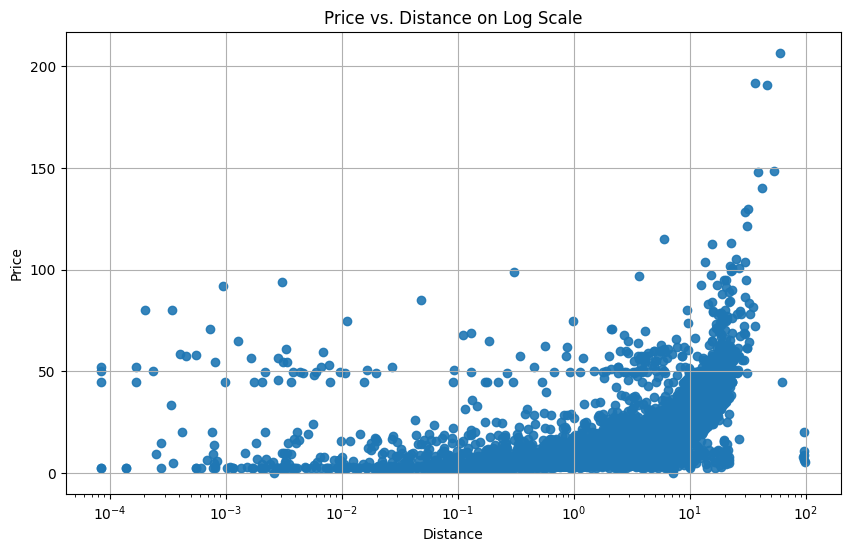

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_night_filter['distance_km'], filtered_df_night_filter['fare_amount'], alpha=0.9)
plt.title('Price vs. Distance on Log Scale')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xscale('log')  # Aplica escala logarítmica no eixo x
plt.grid(True)
plt.show()

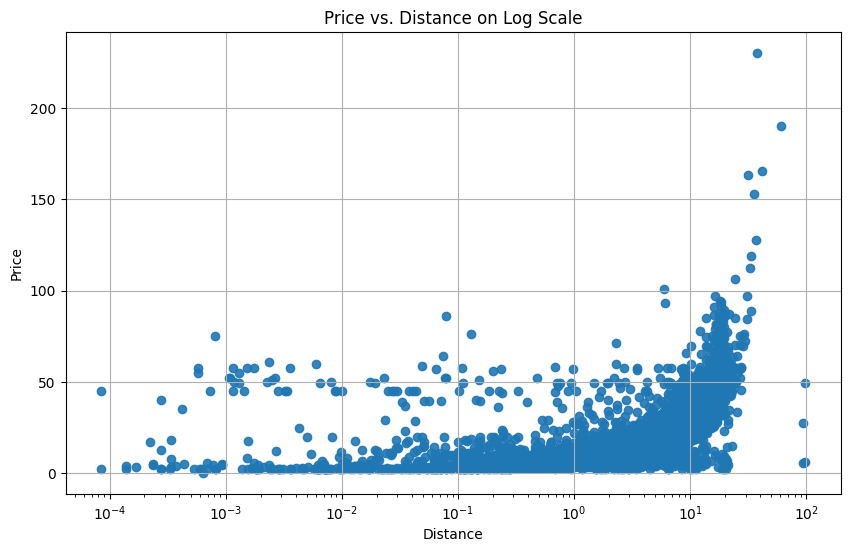

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_morning_filter['distance_km'], filtered_df_morning_filter['fare_amount'], alpha=0.9)
plt.title('Price vs. Distance on Log Scale')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xscale('log')  # Aplica escala logarítmica no eixo x
plt.grid(True)
plt.show()

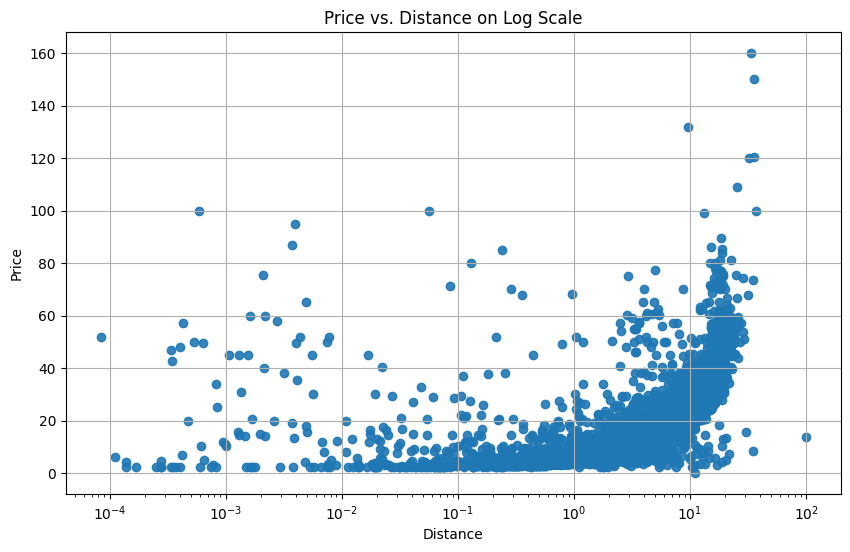

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_dawn_filter['distance_km'], filtered_df_dawn_filter['fare_amount'], alpha=0.9)
plt.title('Price vs. Distance on Log Scale')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xscale('log')  # Aplica escala logarítmica no eixo x
plt.grid(True)
plt.show()

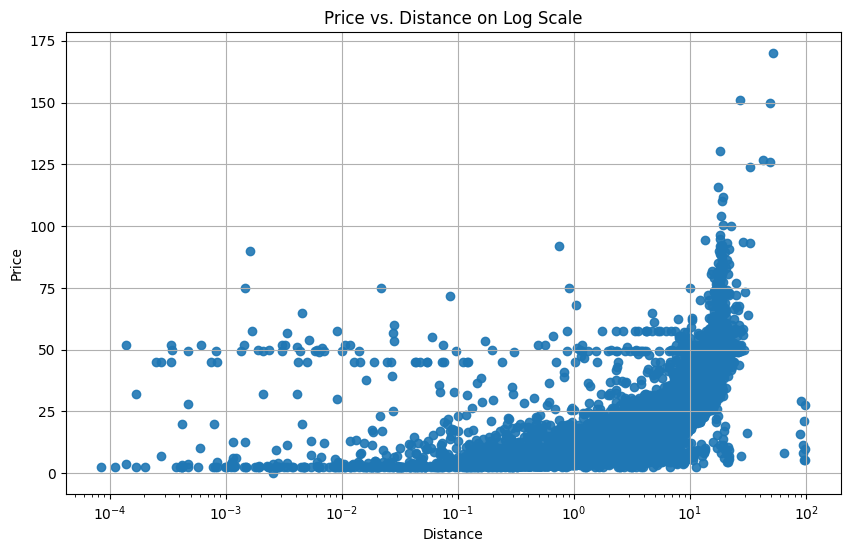

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_afternoon_filter['distance_km'], filtered_df_afternoon_filter['fare_amount'], alpha=0.9)
plt.title('Price vs. Distance on Log Scale')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xscale('log')  # Aplica escala logarítmica no eixo x
plt.grid(True)
plt.show()

#### Droping some outliers data


In [ ]:
filtered_df_afternoon_filter.loc[(filtered_df_afternoon_filter['distance_km'] < 1) & (filtered_df_afternoon_filter['fare_amount'] >25) ]


,index,distance_km,fare_amount,datetime,passenger_count
46,3579,0.069325,35.70,2009-01-03 12:30:00+00:00,1
725,148152,0.024532,45.00,2009-02-02 13:02:00+00:00,1
994,61049,0.002353,50.00,2009-02-14 14:55:00+00:00,1
1132,15013,0.006394,49.15,2009-02-20 12:53:00+00:00,5
1291,59736,0.047328,45.00,2009-02-26 16:40:00+00:00,1
...,...,...,...,...,...
47385,40868,0.000139,52.00,2014-06-05 16:38:29+00:00,1
48850,101526,0.003226,52.00,2014-08-12 14:20:00+00:00,1
52387,147485,0.011682,52.00,2015-01-20 16:50:25+00:00,1
54917,160567,0.562833,52.00,2015-05-15 17:37:13+00:00,1


In [46]:
filtered_df_afternoon_filter=filtered_df_afternoon_filter.drop(filtered_df_afternoon_filter[(filtered_df_afternoon_filter['fare_amount'] > 25) &  (filtered_df_afternoon_filter['distance_km'] <1) ].index)

In [48]:
filtered_df_morning_filter.loc[(filtered_df_morning_filter['distance_km'] < 1) & (filtered_df_morning_filter['fare_amount'] >25) ]


,distance_km,fare_amount,passenger_count,datetime,price_per_km,z_score
189905,0.044000,45.00,1,2009-02-03 08:56:00+00:00,1022.729074,0.328839
162471,0.326819,45.00,1,2009-02-09 10:50:00+00:00,137.691016,0.027376
40884,0.001169,50.00,1,2009-04-21 06:48:00+00:00,42781.041942,14.552617
23229,0.008882,45.00,1,2009-04-30 10:24:00+00:00,5066.306976,1.706168
92111,0.006435,49.57,1,2009-07-17 08:37:00+00:00,7703.285382,2.604380
...,...,...,...,...,...,...
148368,0.023075,52.00,1,2015-02-26 06:53:38+00:00,2253.511691,0.748070
71733,0.032721,39.00,1,2015-03-23 10:01:49+00:00,1191.889214,0.386458
116510,0.476003,52.00,1,2015-05-05 09:12:10+00:00,109.243094,0.017686
129041,0.002970,105.29,1,2015-06-06 11:46:58+00:00,35450.981613,12.055841


In [49]:
filtered_df_morning_filter=filtered_df_morning_filter.drop(filtered_df_morning_filter[(filtered_df_morning_filter['fare_amount'] > 25) &  (filtered_df_morning_filter['distance_km'] <1) ].index)

In [50]:
filtered_df_morning_filter.loc[(filtered_df_morning_filter['distance_km'] < 1) & (filtered_df_morning_filter['fare_amount'] >25) ]


,distance_km,fare_amount,passenger_count,datetime,price_per_km,z_score


In [51]:
filtered_df_night_filter.loc[(filtered_df_night_filter['distance_km'] < 1) & (filtered_df_night_filter['fare_amount'] >25) ]


,index,distance_km,fare_amount,datetime,passenger_count
131,139943,0.004649,49.15,2009-01-07 19:47:59+00:00,1
2186,136534,0.000238,50.00,2009-03-19 20:53:00+00:00,1
2383,67144,0.019688,49.15,2009-03-25 21:18:00+00:00,1
2523,121825,0.003061,94.00,2009-03-29 23:46:00+00:00,1
2564,166157,0.944610,29.15,2009-03-31 19:50:51+00:00,1
...,...,...,...,...,...
63173,138603,0.006667,52.00,2015-02-12 19:49:04+00:00,1
64106,98875,0.450054,52.00,2015-03-20 21:31:14+00:00,5
64243,162978,0.128926,69.00,2015-03-25 21:42:13+00:00,1
66310,16387,0.004431,134.29,2015-06-11 22:14:13+00:00,1


In [52]:
filtered_df_night_filter=filtered_df_night_filter.drop(filtered_df_night_filter[(filtered_df_night_filter['fare_amount'] > 25) &  (filtered_df_night_filter['distance_km'] <1) ].index)

In [53]:
filtered_df_night_filter.loc[(filtered_df_night_filter['distance_km'] < 1) & (filtered_df_night_filter['fare_amount'] >25) ]


,index,distance_km,fare_amount,datetime,passenger_count


In [54]:
filtered_df_dawn_filter.loc[(filtered_df_dawn_filter['distance_km'] < 1) & (filtered_df_dawn_filter['fare_amount'] >25) ]


,distance_km,fare_amount,datetime,passenger_count
83164,0.003731,87.00,2009-06-27 02:26:00+00:00,1
123575,0.000404,48.00,2009-07-22 02:03:00+00:00,1
47499,0.445750,44.90,2009-08-15 00:20:00+00:00,1
119091,0.253608,38.10,2009-09-05 04:55:00+00:00,2
31396,0.002782,58.00,2009-09-18 01:35:00+00:00,1
...,...,...,...,...
129709,0.003926,95.00,2015-03-01 03:52:00+00:00,1
62777,0.093400,28.50,2015-03-22 00:56:27+00:00,1
131107,0.003193,38.00,2015-03-27 03:11:41+00:00,1
111521,0.000643,49.75,2015-05-02 04:44:08+00:00,1


In [55]:
filtered_df_dawn_filter=filtered_df_dawn_filter.drop(filtered_df_dawn_filter[(filtered_df_dawn_filter['fare_amount'] > 25) &  (filtered_df_dawn_filter['distance_km'] <1) ].index)

In [56]:
filtered_df_dawn_filter.loc[(filtered_df_dawn_filter['distance_km'] < 1) & (filtered_df_dawn_filter['fare_amount'] >25) ]


,distance_km,fare_amount,datetime,passenger_count


In [ ]:
filtered_df_afternoon_filter

,index,distance_km,fare_amount,datetime,passenger_count
0,110270,2.678890,9.3,2009-01-01 12:03:00+00:00,1
1,161854,9.264525,18.9,2009-01-01 12:12:00+00:00,2
2,4217,0.407792,3.7,2009-01-01 12:18:00+00:00,1
3,2200,4.828700,9.3,2009-01-01 12:26:00+00:00,1
4,78835,2.681877,6.9,2009-01-01 12:33:40+00:00,1
...,...,...,...,...,...
55852,121575,1.661548,7.0,2015-06-30 16:09:27+00:00,1
55853,185613,2.462976,11.5,2015-06-30 16:23:15+00:00,1
55854,181119,3.547580,16.0,2015-06-30 17:15:01+00:00,1
55855,75229,3.917169,22.5,2015-06-30 17:18:12+00:00,1


In [57]:
import numpy as np
from scipy import stats

filtered_df_afternoon_filter['price_per_km'] = filtered_df_afternoon_filter['fare_amount'] / filtered_df_afternoon_filter['distance_km']

filtered_df_afternoon_filter['z_score'] = np.abs(stats.zscore(filtered_df_afternoon_filter['price_per_km']))

outliers = filtered_df_afternoon_filter[filtered_df_afternoon_filter['z_score'] > 3]


print(outliers.count())


distance_km        0
fare_amount        0
datetime           0
passenger_count    0
price_per_km       0
z_score            0
dtype: int64


/home/vanderson/miniconda3/envs/chatbot_model/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [106]:
import numpy as np
import pandas as pd
from scipy import stats

filtered_df_morning_filter['price_per_km'] = filtered_df_morning_filter['fare_amount'] / filtered_df_morning_filter['distance_km']

filtered_df_morning_filter['z_score'] = np.abs(stats.zscore(filtered_df_morning_filter['price_per_km']))

outliers = filtered_df_morning_filter[filtered_df_morning_filter['z_score'] > 3]



print(outliers)
print(outliers.count())

        distance_km  fare_amount  passenger_count                  datetime  \
21385      0.001555         17.5                5 2009-02-15 11:15:00+00:00   
68770      0.000606          2.5                1 2009-04-13 11:20:00+00:00   
20136      0.000778          4.5                5 2009-05-13 06:02:00+00:00   
193365     0.001907          4.5                5 2009-06-30 09:21:00+00:00   
8243       0.000222         17.3                1 2009-09-26 11:54:29+00:00   
26269      0.000334          2.5                5 2009-10-05 10:10:00+00:00   
119189     0.000084          2.5                1 2009-10-11 08:18:00+00:00   
30275      0.000337          3.3                1 2009-10-25 09:46:00+00:00   
1474       0.000337          8.0                1 2009-11-18 07:47:00+00:00   
102588     0.000276          2.5                1 2010-01-12 10:20:00+00:00   
125257     0.000168          3.3                2 2010-03-02 09:28:54+00:00   
159650     0.000688          2.5                5 20

In [107]:

filtered_df_afternoon_filter['price_per_km'] = filtered_df_afternoon_filter['fare_amount'] / filtered_df_afternoon_filter['distance_km']

filtered_df_afternoon_filter['z_score'] = np.abs(stats.zscore(filtered_df_afternoon_filter['price_per_km']))

outliers = filtered_df_afternoon_filter[filtered_df_afternoon_filter['z_score'] > 3]



print(outliers)
print(outliers.count())

Empty DataFrame
Columns: [distance_km, fare_amount, datetime, passenger_count, price_per_km, z_score]
Index: []
distance_km        0
fare_amount        0
datetime           0
passenger_count    0
price_per_km       0
z_score            0
dtype: int64


/home/vanderson/miniconda3/envs/chatbot_model/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [108]:

filtered_df_night_filter['price_per_km'] = filtered_df_night_filter['fare_amount'] / filtered_df_night_filter['distance_km']

filtered_df_night_filter['z_score'] = np.abs(stats.zscore(filtered_df_night_filter['price_per_km']))

outliers = filtered_df_night_filter[filtered_df_night_filter['z_score'] > 3]



print(outliers)
print(outliers.count())

        index  distance_km  fare_amount                  datetime  \
732    113756     0.000355          5.0 2009-01-27 23:10:00+00:00   
1054    67119     0.001101          3.0 2009-02-07 22:37:19+00:00   
2041    90537     0.000767         20.0 2009-03-13 23:38:00+00:00   
2134    43994     0.002208          7.0 2009-03-17 22:17:14+00:00   
2141    53763     0.003517          4.5 2009-03-18 18:04:00+00:00   
2865    62316     0.000818          3.5 2009-04-10 19:43:15+00:00   
5680    63351     0.000837          6.1 2009-07-19 21:34:19+00:00   
6327   194516     0.002434          4.5 2009-08-13 23:45:01+00:00   
6335    91350     0.000139          2.5 2009-08-14 18:52:08+00:00   
6355   168751     0.003291          6.5 2009-08-14 21:47:42+00:00   
6973   124190     0.001726          2.5 2009-09-10 18:01:26+00:00   
7458   114973     0.000796         13.8 2009-09-26 22:20:00+00:00   
9267    86575     0.002537          5.5 2009-12-01 22:55:00+00:00   
10704  161846     0.001161        

In [109]:

filtered_df_dawn_filter['price_per_km'] = filtered_df_dawn_filter['fare_amount'] / filtered_df_dawn_filter['distance_km']

filtered_df_dawn_filter['z_score'] = np.abs(stats.zscore(filtered_df_dawn_filter['price_per_km']))

outliers = filtered_df_dawn_filter[filtered_df_dawn_filter['z_score'] > 3]

print(outliers)
print(outliers.count())

Empty DataFrame
Columns: [distance_km, fare_amount, datetime, passenger_count, price_per_km, z_score]
Index: []
distance_km        0
fare_amount        0
datetime           0
passenger_count    0
price_per_km       0
z_score            0
dtype: int64


In [110]:
filtered_df_dawn_filter.describe()

,distance_km,fare_amount,passenger_count,price_per_km,z_score
count,24841.000000,24842.000000,24842.000000,24841.000000,0.0
mean,4.066650,11.985729,1.742654,22.854008,NaN
std,3.969716,9.460430,1.314910,622.936159,NaN
min,0.000111,0.000000,0.000000,0.000000,NaN
25%,1.524314,6.100000,1.000000,2.591314,NaN
50%,2.794993,9.000000,1.000000,3.267239,NaN
75%,5.303468,14.500000,2.000000,4.315551,NaN
max,125.275929,160.000000,6.000000,55757.939346,NaN


In [111]:
filtered_df_morning_filter.describe()

,distance_km,fare_amount,passenger_count,price_per_km,z_score
count,46724.000000,46724.000000,46724.000000,46724.000000,46724.000000
mean,3.186540,11.045307,1.600056,16.297106,0.040283
std,3.729575,9.507381,1.601326,584.351070,0.999199
min,0.000084,0.000000,0.000000,0.000000,0.000002
25%,1.214419,6.000000,1.000000,3.080002,0.019047
50%,2.036185,8.100000,1.000000,3.968799,0.021149
75%,3.633293,12.100000,1.000000,5.219440,0.022663
max,176.519081,230.000000,208.000000,77791.319347,133.097822


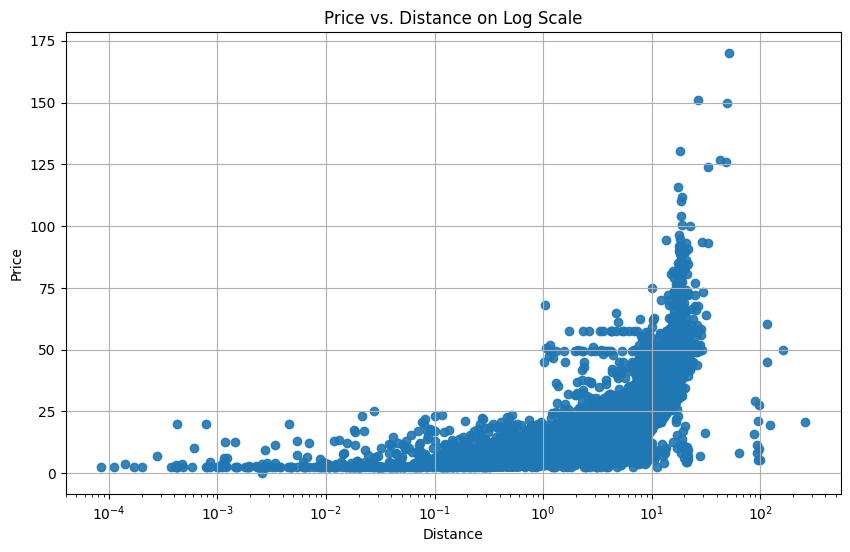

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_afternoon_filter['distance_km'], filtered_df_afternoon_filter['fare_amount'], alpha=0.9)
plt.title('Price vs. Distance on Log Scale')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xscale('log')  # Aplica escala logarítmica no eixo x
plt.grid(True)
plt.show()

In [113]:
filtered_df_afternoon_filter['fare_amount'].max()

170.0

In [114]:
filtered_df_afternoon_filter.loc[filtered_df_afternoon_filter['fare_amount'] == 220.0]

,distance_km,fare_amount,datetime,passenger_count,price_per_km,z_score


In [115]:
filtered_df_afternoon_filter=filtered_df_afternoon_filter.drop(filtered_df_afternoon_filter[(filtered_df_afternoon_filter['fare_amount'] == 220) ].index)

In [116]:
filtered_df_afternoon_filter.loc[filtered_df_afternoon_filter['fare_amount'] == 220.0]

,distance_km,fare_amount,datetime,passenger_count,price_per_km,z_score


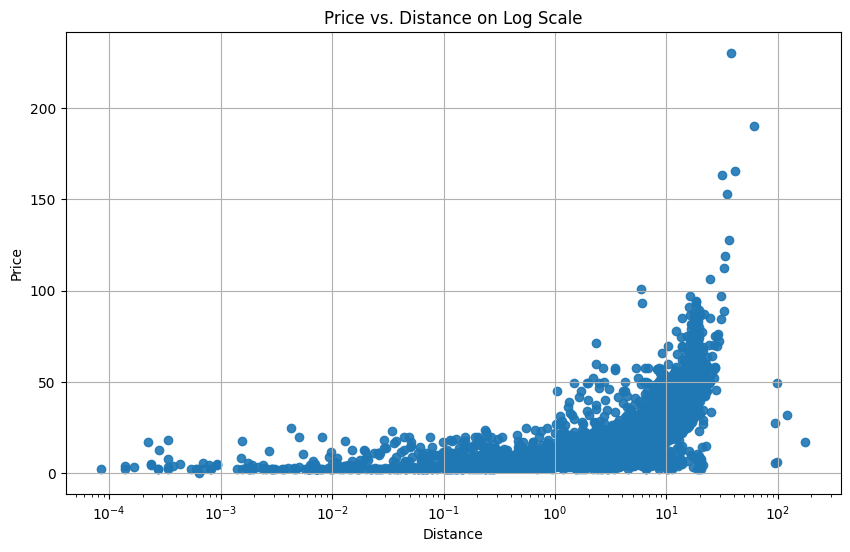

In [117]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_morning_filter['distance_km'], filtered_df_morning_filter['fare_amount'], alpha=0.9)
plt.title('Price vs. Distance on Log Scale')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xscale('log')  # Aplica escala logarítmica no eixo x
plt.grid(True)
plt.show()

In [118]:
filtered_df_morning_filter['fare_amount'].max()

230.0

In [119]:
filtered_df_morning_filter.loc[filtered_df_morning_filter['fare_amount'] == 230.0]

,distance_km,fare_amount,passenger_count,datetime,price_per_km,z_score
197493,37.989067,230.0,2,2014-09-07 08:39:00+00:00,6.054373,0.017529


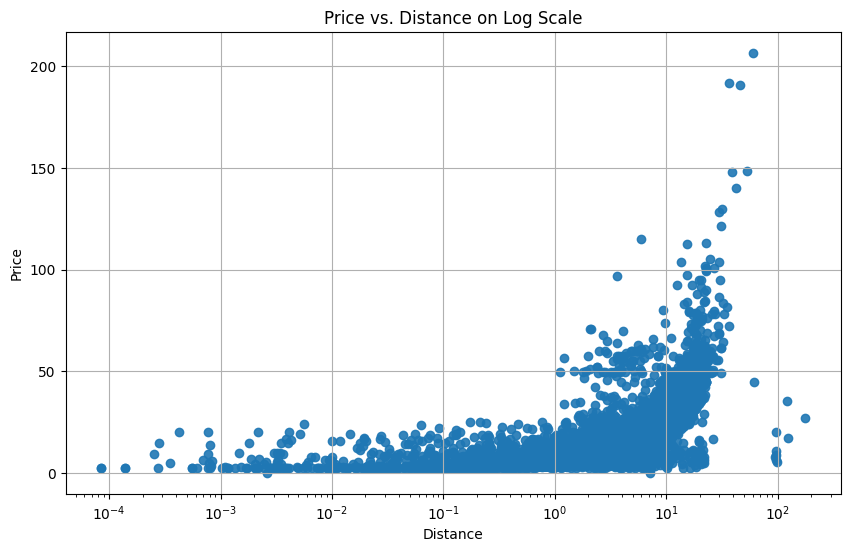

In [120]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_night_filter['distance_km'], filtered_df_night_filter['fare_amount'], alpha=0.9)
plt.title('Price vs. Distance on Log Scale')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xscale('log')  # Aplica escala logarítmica no eixo x
plt.grid(True)
plt.show()

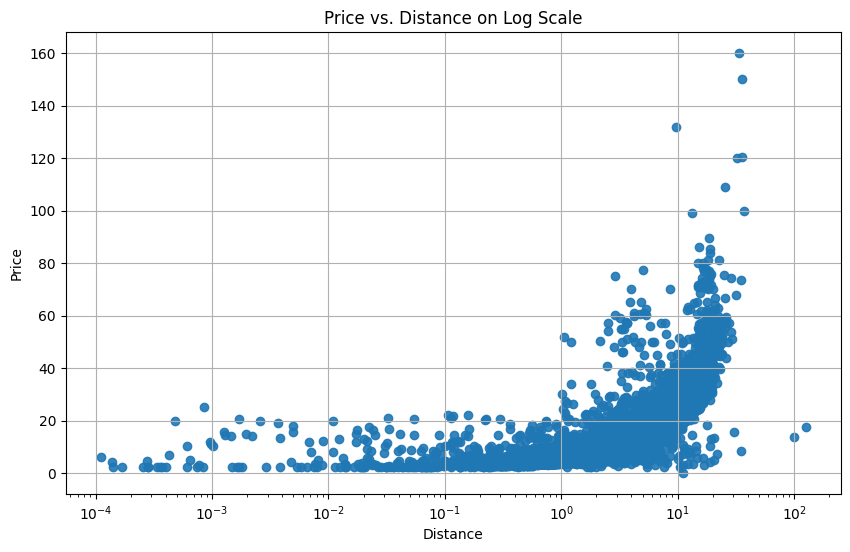

In [121]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_dawn_filter['distance_km'], filtered_df_dawn_filter['fare_amount'], alpha=0.9)
plt.title('Price vs. Distance on Log Scale')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xscale('log')  # Aplica escala logarítmica no eixo x
plt.grid(True)
plt.show()

#### Filtering this data with distance > 10³ and price low, seems miss data


In [122]:
filtered_df_morning_filter.loc[filtered_df_morning_filter['distance_km']> 8000]


,distance_km,fare_amount,passenger_count,datetime,price_per_km,z_score


In [123]:
filtered_df_morning_filter=filtered_df_morning_filter.drop(filtered_df_morning_filter[(filtered_df_morning_filter['distance_km'] > 8000) ].index)

In [124]:
filtered_df_afternoon_filter.loc[filtered_df_afternoon_filter['distance_km']> 8000]


,distance_km,fare_amount,datetime,passenger_count,price_per_km,z_score


In [125]:
filtered_df_night_filter.loc[filtered_df_night_filter['distance_km']> 8000]


,index,distance_km,fare_amount,datetime,passenger_count,price_per_km,z_score


In [126]:
filtered_df_dawn_filter.loc[filtered_df_dawn_filter['distance_km']> 8000]


,distance_km,fare_amount,datetime,passenger_count,price_per_km,z_score


In [127]:
filtered_df_morning_filter=filtered_df_morning_filter.drop(filtered_df_morning_filter[(filtered_df_morning_filter['distance_km'] > 8000) ].index)
filtered_df_afternoon_filter=filtered_df_afternoon_filter.drop(filtered_df_afternoon_filter[(filtered_df_afternoon_filter['distance_km'] > 8000) ].index)
filtered_df_night_filter=filtered_df_night_filter.drop(filtered_df_night_filter[(filtered_df_night_filter['distance_km'] > 8000) ].index)
filtered_df_dawn_filter=filtered_df_dawn_filter.drop(filtered_df_dawn_filter[(filtered_df_dawn_filter['distance_km'] > 8000) ].index)

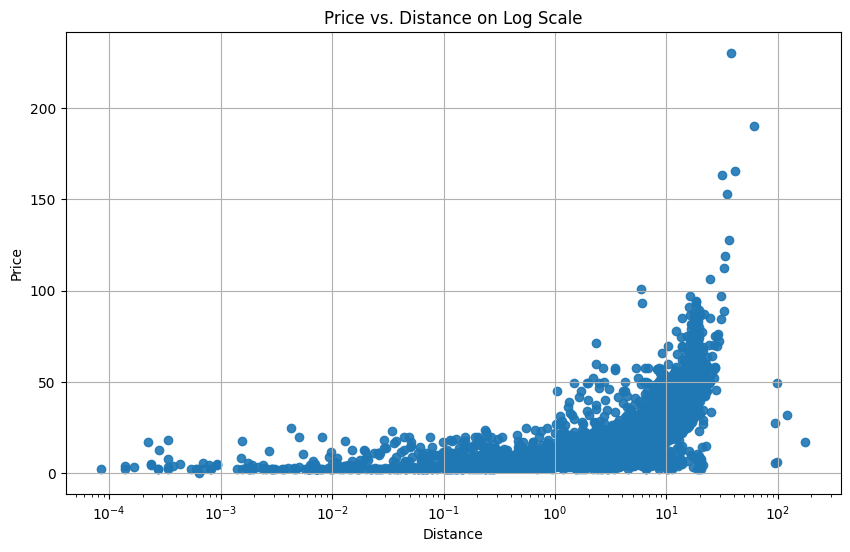

In [128]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_morning_filter['distance_km'], filtered_df_morning_filter['fare_amount'], alpha=0.9)
plt.title('Price vs. Distance on Log Scale')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xscale('log')  # Aplica escala logarítmica no eixo x
plt.grid(True)
plt.show()

In [129]:
filtered_df_morning_filter.loc[filtered_df_morning_filter['distance_km']> 1000]

,distance_km,fare_amount,passenger_count,datetime,price_per_km,z_score


In [130]:
filtered_df_afternoon_filter.loc[filtered_df_afternoon_filter['distance_km']> 1000]

,distance_km,fare_amount,datetime,passenger_count,price_per_km,z_score


In [131]:
filtered_df_night_filter.loc[filtered_df_night_filter['distance_km']> 1000]

,index,distance_km,fare_amount,datetime,passenger_count,price_per_km,z_score


In [132]:
filtered_df_dawn_filter.loc[filtered_df_dawn_filter['distance_km']> 1000]

,distance_km,fare_amount,datetime,passenger_count,price_per_km,z_score


In [133]:
filtered_df_morning_filter=filtered_df_morning_filter.drop(filtered_df_morning_filter[(filtered_df_morning_filter['distance_km'] > 1000) ].index)
filtered_df_afternoon_filter=filtered_df_afternoon_filter.drop(filtered_df_afternoon_filter[(filtered_df_afternoon_filter['distance_km'] > 1000) ].index)
filtered_df_night_filter=filtered_df_night_filter.drop(filtered_df_night_filter[(filtered_df_night_filter['distance_km'] > 1000) ].index)
filtered_df_dawn_filter=filtered_df_dawn_filter.drop(filtered_df_dawn_filter[(filtered_df_dawn_filter['distance_km'] > 1000) ].index)

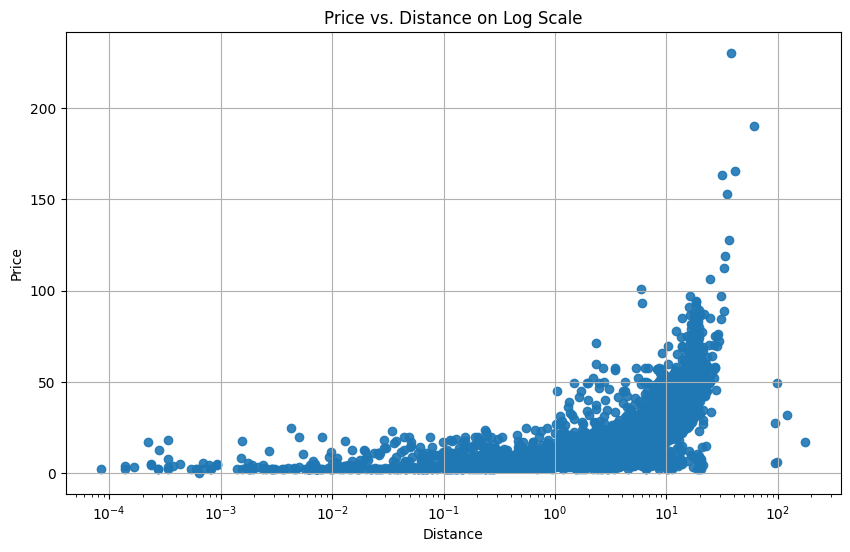

In [134]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_morning_filter['distance_km'], filtered_df_morning_filter['fare_amount'], alpha=0.9)
plt.title('Price vs. Distance on Log Scale')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xscale('log')  # Aplica escala logarítmica no eixo x
plt.grid(True)
plt.show()

In [135]:
filtered_df_morning_filter.loc[(filtered_df_morning_filter['distance_km']> 100) & (filtered_df_morning_filter['fare_amount'] < 15) ]

,distance_km,fare_amount,passenger_count,datetime,price_per_km,z_score


In [136]:
filtered_df_morning_filter=filtered_df_morning_filter.drop(filtered_df_morning_filter[(filtered_df_morning_filter['distance_km'] > 100)  & (filtered_df_morning_filter['fare_amount'] < 15) ].index)

In [137]:
filtered_df_afternoon_filter=filtered_df_afternoon_filter.drop(filtered_df_afternoon_filter[(filtered_df_afternoon_filter['distance_km'] > 100)  & (filtered_df_afternoon_filter['fare_amount'] < 15) ].index)

In [138]:
filtered_df_night_filter=filtered_df_night_filter.drop(filtered_df_night_filter[(filtered_df_night_filter['distance_km'] > 100)  & (filtered_df_night_filter['fare_amount'] < 15) ].index)

In [139]:
filtered_df_dawn_filter=filtered_df_dawn_filter.drop(filtered_df_dawn_filter[(filtered_df_dawn_filter['distance_km'] > 100)  & (filtered_df_dawn_filter['fare_amount'] < 15) ].index)

### Now, the data seems more clean and consistent


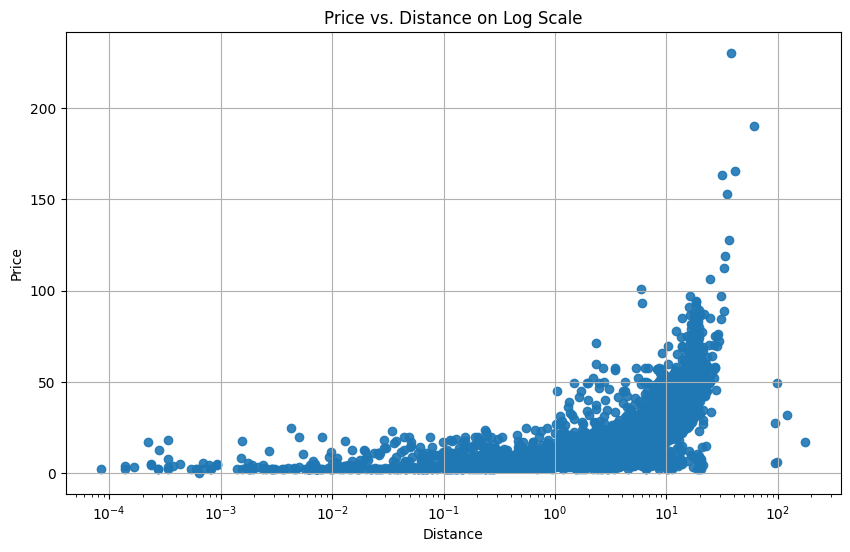

In [140]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_morning_filter['distance_km'], filtered_df_morning_filter['fare_amount'], alpha=0.9)
plt.title('Price vs. Distance on Log Scale')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xscale('log')  # Aplica escala logarítmica no eixo x
plt.grid(True)
plt.show()

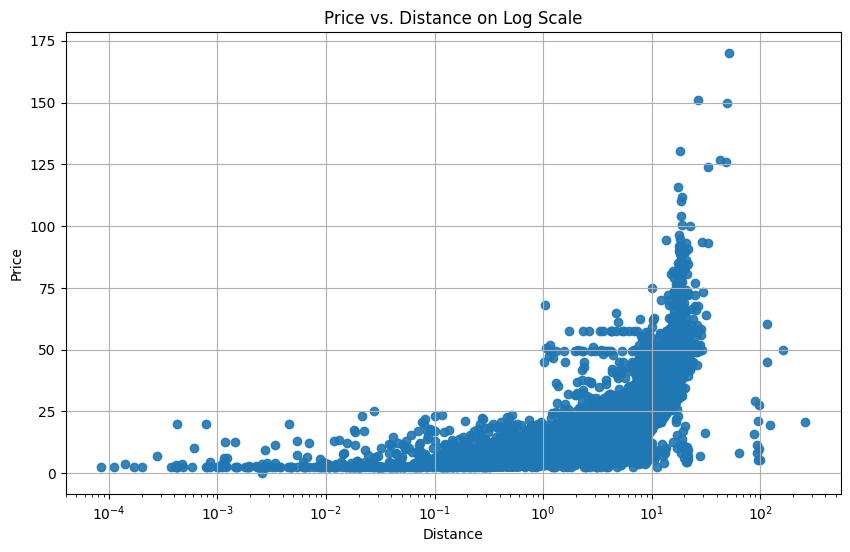

In [141]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_afternoon_filter['distance_km'], filtered_df_afternoon_filter['fare_amount'], alpha=0.9)
plt.title('Price vs. Distance on Log Scale')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xscale('log')  # Aplica escala logarítmica no eixo x
plt.grid(True)
plt.show()

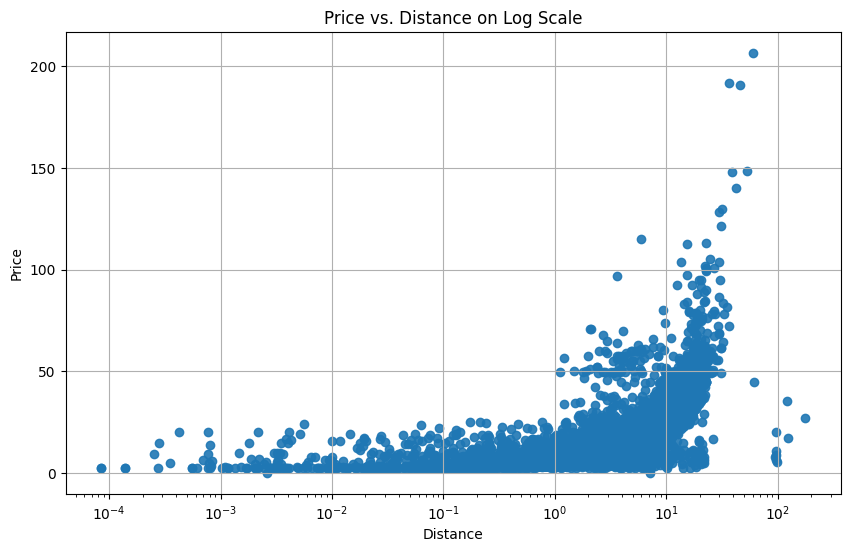

In [142]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_night_filter['distance_km'], filtered_df_night_filter['fare_amount'], alpha=0.9)
plt.title('Price vs. Distance on Log Scale')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xscale('log')  # Aplica escala logarítmica no eixo x
plt.grid(True)
plt.show()

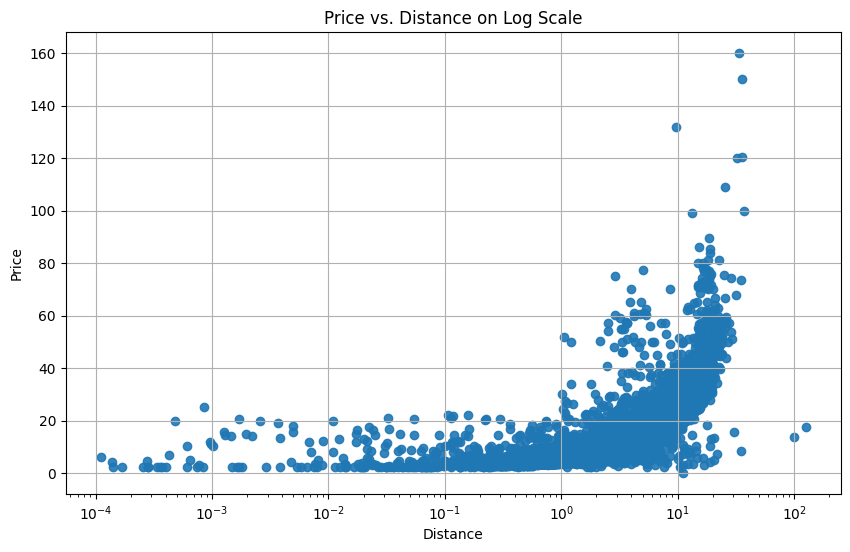

In [143]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_dawn_filter['distance_km'], filtered_df_dawn_filter['fare_amount'], alpha=0.9)
plt.title('Price vs. Distance on Log Scale')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xscale('log')  # Aplica escala logarítmica no eixo x
plt.grid(True)
plt.show()

In [144]:
filtered_df_dawn_filter.describe()

,distance_km,fare_amount,passenger_count,price_per_km,z_score
count,24841.000000,24842.000000,24842.000000,24841.000000,0.0
mean,4.066650,11.985729,1.742654,22.854008,NaN
std,3.969716,9.460430,1.314910,622.936159,NaN
min,0.000111,0.000000,0.000000,0.000000,NaN
25%,1.524314,6.100000,1.000000,2.591314,NaN
50%,2.794993,9.000000,1.000000,3.267239,NaN
75%,5.303468,14.500000,2.000000,4.315551,NaN
max,125.275929,160.000000,6.000000,55757.939346,NaN


In [145]:
filtered_df_morning_filter.describe()

,distance_km,fare_amount,passenger_count,price_per_km,z_score
count,46724.000000,46724.000000,46724.000000,46724.000000,46724.000000
mean,3.186540,11.045307,1.600056,16.297106,0.040283
std,3.729575,9.507381,1.601326,584.351070,0.999199
min,0.000084,0.000000,0.000000,0.000000,0.000002
25%,1.214419,6.000000,1.000000,3.080002,0.019047
50%,2.036185,8.100000,1.000000,3.968799,0.021149
75%,3.633293,12.100000,1.000000,5.219440,0.022663
max,176.519081,230.000000,208.000000,77791.319347,133.097822


In [154]:
filtered_df_dawn_filter.drop(columns=['z_score'])


,distance_km,fare_amount,datetime,passenger_count,price_per_km
100844,2.244765,8.5,2009-01-01 01:15:22+00:00,2,3.786588
43961,3.916842,13.0,2009-01-01 01:59:17+00:00,2,3.319001
7628,3.786736,10.6,2009-01-01 02:05:03+00:00,2,2.799244
118760,5.946957,12.2,2009-01-01 02:09:13+00:00,1,2.051469
89763,2.784022,11.0,2009-01-01 02:13:41+00:00,4,3.951118
...,...,...,...,...,...
90952,1.538492,7.0,2015-06-30 00:55:32+00:00,1,4.549910
1598,9.647191,27.5,2015-06-30 01:31:06+00:00,1,2.850571
145363,1.169502,5.5,2015-06-30 02:14:12+00:00,1,4.702858
51976,1.747834,7.5,2015-06-30 04:59:22+00:00,2,4.291026


In [155]:
filtered_df_morning_filter.drop(columns=['z_score'])
filtered_df_afternoon_filter.drop(columns=['z_score'])
filtered_df_night_filter.drop(columns=['z_score'])

,index,distance_km,fare_amount,datetime,passenger_count,price_per_km
0,17069,2.065646,6.5,2009-01-01 18:15:36+00:00,2,3.146716
1,145044,6.899536,17.7,2009-01-01 18:55:30+00:00,3,2.565390
2,44544,1.178621,5.7,2009-01-01 19:02:00+00:00,2,4.836161
3,189252,3.201176,7.7,2009-01-01 19:24:52+00:00,2,2.405366
4,89477,1.375591,7.7,2009-01-01 19:32:00+00:00,2,5.597594
...,...,...,...,...,...,...
66739,2173,5.610774,18.5,2015-06-30 22:57:53+00:00,2,3.297228
66740,80850,9.221233,25.5,2015-06-30 23:16:42+00:00,2,2.765357
66741,56905,5.447442,20.0,2015-06-30 23:31:06+00:00,4,3.671448
66742,32718,1.998738,8.5,2015-06-30 23:33:33+00:00,1,4.252683


In [157]:
print(filtered_df_morning_filter.dtypes)
print(filtered_df_afternoon_filter.dtypes)
print(filtered_df_night_filter.dtypes)
print(filtered_df_dawn_filter.dtypes)

distance_km                    float64
fare_amount                    float64
passenger_count                  int64
datetime           datetime64[ns, UTC]
price_per_km                   float64
z_score                        float64
dtype: object
distance_km                    float64
fare_amount                    float64
datetime           datetime64[ns, UTC]
passenger_count                  int64
price_per_km                   float64
z_score                        float64
dtype: object
index                            int64
distance_km                    float64
fare_amount                    float64
datetime           datetime64[ns, UTC]
passenger_count                  int64
price_per_km                   float64
z_score                        float64
dtype: object
distance_km                    float64
fare_amount                    float64
datetime           datetime64[ns, UTC]
passenger_count                  int64
price_per_km                   float64
z_score               

In [158]:
dataframe_uber_list = [filtered_df_morning_filter, filtered_df_afternoon_filter, filtered_df_night_filter, filtered_df_dawn_filter]
data_frame_uber = pd.concat(dataframe_uber_list, ignore_index=True)
print(data_frame_uber)

        distance_km  fare_amount  passenger_count                  datetime  \
0          8.140743        27.45                2 2009-01-01 10:11:29+00:00   
1          3.743181        10.10                2 2009-01-01 10:35:00+00:00   
2          1.138809         4.50                1 2009-01-01 11:46:00+00:00   
3         23.094241        49.15                2 2009-01-02 06:13:38+00:00   
4          2.015965         6.10                1 2009-01-02 06:44:31+00:00   
...             ...          ...              ...                       ...   
195165     1.538492         7.00                1 2015-06-30 00:55:32+00:00   
195166     9.647191        27.50                1 2015-06-30 01:31:06+00:00   
195167     1.169502         5.50                1 2015-06-30 02:14:12+00:00   
195168     1.747834         7.50                2 2015-06-30 04:59:22+00:00   
195169     2.980978        16.00                1 2015-06-30 05:48:02+00:00   

        price_per_km   z_score  index  
0          

In [159]:
data_frame_uber

,distance_km,fare_amount,passenger_count,datetime,price_per_km,z_score,index
0,8.140743,27.45,2,2009-01-01 10:11:29+00:00,3.371928,0.022119,NaN
1,3.743181,10.10,2,2009-01-01 10:35:00+00:00,2.698240,0.023272,NaN
2,1.138809,4.50,1,2009-01-01 11:46:00+00:00,3.951496,0.021127,NaN
3,23.094241,49.15,2,2009-01-02 06:13:38+00:00,2.128236,0.024247,NaN
4,2.015965,6.10,1,2009-01-02 06:44:31+00:00,3.025847,0.022711,NaN
...,...,...,...,...,...,...,...
195165,1.538492,7.00,1,2015-06-30 00:55:32+00:00,4.549910,NaN,NaN
195166,9.647191,27.50,1,2015-06-30 01:31:06+00:00,2.850571,NaN,NaN
195167,1.169502,5.50,1,2015-06-30 02:14:12+00:00,4.702858,NaN,NaN
195168,1.747834,7.50,2,2015-06-30 04:59:22+00:00,4.291026,NaN,NaN


In [162]:
data_frame_uber=data_frame_uber.drop(columns=['z_score','index'])

In [166]:
data_frame_uber.sort_values('distance_km')

,distance_km,fare_amount,passenger_count,datetime,price_per_km
103287,0.000000,10.5,1,2015-06-03 14:26:14+00:00,inf
66857,0.000000,5.7,1,2011-04-14 16:04:00+00:00,inf
66854,0.000000,4.9,1,2011-04-14 15:48:03+00:00,inf
66839,0.000000,8.5,1,2011-04-14 13:02:31+00:00,inf
50395,0.000000,7.7,1,2009-06-03 14:38:31+00:00,inf
...,...,...,...,...,...
67518,163.187094,49.8,1,2011-05-09 13:41:53+00:00,0.305171
17220,176.519081,17.3,1,2011-05-28 07:49:41+00:00,0.098006
125188,177.995633,27.3,1,2011-02-17 18:30:35+00:00,0.153375
93265,261.372661,20.5,1,2014-03-17 13:25:00+00:00,0.078432


In [167]:
data_frame_uber.loc[data_frame_uber['distance_km']==0]

,distance_km,fare_amount,passenger_count,datetime,price_per_km
46740,0.0,4.1,3,2009-01-01 15:12:00+00:00,inf
46745,0.0,6.9,1,2009-01-01 16:23:51+00:00,inf
46748,0.0,12.5,3,2009-01-01 16:37:35+00:00,inf
46759,0.0,3.3,1,2009-01-02 13:39:35+00:00,inf
46864,0.0,5.7,3,2009-01-07 16:55:00+00:00,inf
...,...,...,...,...,...
103565,0.0,6.5,1,2015-06-17 15:08:05+00:00,inf
103574,0.0,10.5,1,2015-06-17 17:57:15+00:00,inf
103598,0.0,6.5,1,2015-06-19 12:07:26+00:00,inf
103678,0.0,2.5,5,2015-06-23 15:43:03+00:00,inf


In [168]:
data_frame_uber=data_frame_uber.drop(data_frame_uber[(data_frame_uber['distance_km'] == 0)  ].index)

In [169]:
data_frame_uber.loc[data_frame_uber['distance_km']==0]

,distance_km,fare_amount,passenger_count,datetime,price_per_km


In [170]:
data_frame_uber.sort_values('distance_km')

,distance_km,fare_amount,passenger_count,datetime,price_per_km
5564,0.000084,2.5,1,2009-10-11 08:18:00+00:00,29680.212263
99032,0.000084,2.5,1,2014-11-22 14:59:24+00:00,29675.722769
150173,0.000084,2.5,1,2013-06-17 19:58:36+00:00,29669.516984
143298,0.000084,2.5,1,2012-10-24 22:24:22+00:00,29664.527019
51060,0.000111,2.5,1,2009-06-30 17:03:37+00:00,22483.040202
...,...,...,...,...,...
67518,163.187094,49.8,1,2011-05-09 13:41:53+00:00,0.305171
17220,176.519081,17.3,1,2011-05-28 07:49:41+00:00,0.098006
125188,177.995633,27.3,1,2011-02-17 18:30:35+00:00,0.153375
93265,261.372661,20.5,1,2014-03-17 13:25:00+00:00,0.078432


In [174]:
filtered_df = data_frame_uber[data_frame_uber[['distance_km', 'fare_amount']].isna().any(axis=1)]
filtered_df

,distance_km,fare_amount,passenger_count,datetime,price_per_km
187767,NaN,24.1,0,2013-07-02 03:51:57+00:00,NaN


In [175]:
data_frame_uber[data_frame_uber[['distance_km']].isna().any(axis=1)]


,distance_km,fare_amount,passenger_count,datetime,price_per_km
187767,NaN,24.1,0,2013-07-02 03:51:57+00:00,NaN


In [178]:
data_frame_uber=data_frame_uber.drop(data_frame_uber[data_frame_uber[['distance_km']].isna().any(axis=1) ].index)

In [179]:
data_frame_uber[data_frame_uber[['distance_km']].isna().any(axis=1)]

,distance_km,fare_amount,passenger_count,datetime,price_per_km


In [180]:
data_frame_uber.sort_values('distance_km')

,distance_km,fare_amount,passenger_count,datetime,price_per_km
5564,0.000084,2.5,1,2009-10-11 08:18:00+00:00,29680.212263
99032,0.000084,2.5,1,2014-11-22 14:59:24+00:00,29675.722769
150173,0.000084,2.5,1,2013-06-17 19:58:36+00:00,29669.516984
143298,0.000084,2.5,1,2012-10-24 22:24:22+00:00,29664.527019
51060,0.000111,2.5,1,2009-06-30 17:03:37+00:00,22483.040202
...,...,...,...,...,...
178219,125.275929,17.7,2,2011-02-05 02:20:22+00:00,0.141288
67518,163.187094,49.8,1,2011-05-09 13:41:53+00:00,0.305171
17220,176.519081,17.3,1,2011-05-28 07:49:41+00:00,0.098006
125188,177.995633,27.3,1,2011-02-17 18:30:35+00:00,0.153375


### Final analysis of the price x distance from the uber dataframe


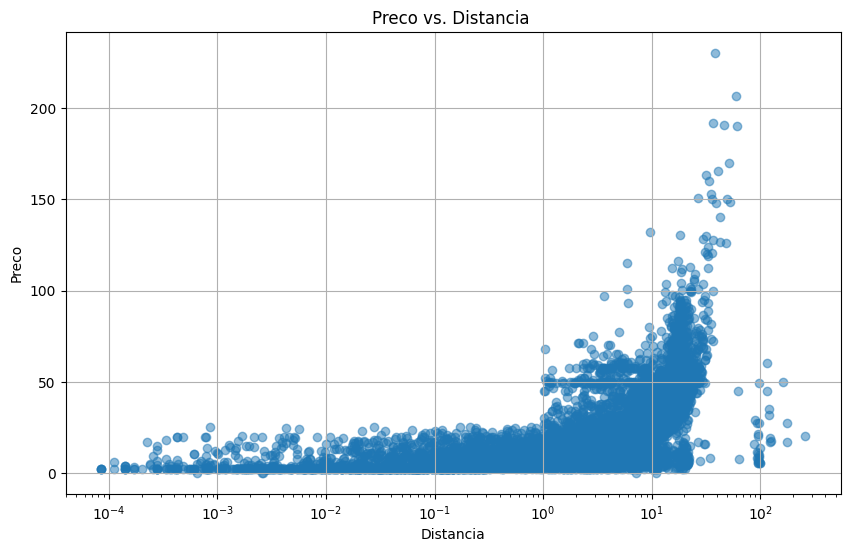

In [182]:
plt.figure(figsize=(10, 6))
plt.scatter(data_frame_uber['distance_km'], data_frame_uber['fare_amount'], alpha=0.5)
plt.title('Preco vs. Distancia ')
plt.xlabel('Distancia')
plt.ylabel('Preco')
plt.xscale('log')  
plt.grid(True)
plt.show()

In [183]:
data_frame_uber['hour']=data_frame_uber['datetime'].dt.hour
data_frame_uber

,distance_km,fare_amount,passenger_count,datetime,price_per_km,hour
0,8.140743,27.45,2,2009-01-01 10:11:29+00:00,3.371928,10
1,3.743181,10.10,2,2009-01-01 10:35:00+00:00,2.698240,10
2,1.138809,4.50,1,2009-01-01 11:46:00+00:00,3.951496,11
3,23.094241,49.15,2,2009-01-02 06:13:38+00:00,2.128236,6
4,2.015965,6.10,1,2009-01-02 06:44:31+00:00,3.025847,6
...,...,...,...,...,...,...
195165,1.538492,7.00,1,2015-06-30 00:55:32+00:00,4.549910,0
195166,9.647191,27.50,1,2015-06-30 01:31:06+00:00,2.850571,1
195167,1.169502,5.50,1,2015-06-30 02:14:12+00:00,4.702858,2
195168,1.747834,7.50,2,2015-06-30 04:59:22+00:00,4.291026,4


# Applying Linear Regression to predict new datas

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



X = data_frame_uber[['distance_km', 'hour']]  
y = data_frame_uber['fare_amount'] 

In [185]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [190]:
new_distance = 5
new_hour = 1
new_data = pd.DataFrame({'distance_km': [new_distance], 'hour': [new_hour]})

predicted_price = model.predict(new_data)[0]

print("Predicted price for a", new_distance, "km ride at", new_hour, "hour:", predicted_price)

Predicted price for a 5 km ride at 1 hour: 14.480519948980369


In [191]:
new_distance = 1
new_hour = 1
new_data = pd.DataFrame({'distance_km': [new_distance], 'hour': [new_hour]})

predicted_price = model.predict(new_data)[0]

print("Predicted price for a", new_distance, "km ride at", new_hour, "hour:", predicted_price)

Predicted price for a 1 km ride at 1 hour: 6.322478432405651


In [195]:
new_distance = 1
new_hour = 12
new_data = pd.DataFrame({'distance_km': [new_distance], 'hour': [new_hour]})

predicted_price = model.predict(new_data)[0]

print("Predicted price for a", new_distance, "km ride at", new_hour, "hour:", predicted_price)

Predicted price for a 1 km ride at 12 hour: 6.412989655916425


In [192]:
new_distance = 10
new_hour = 1
new_data = pd.DataFrame({'distance_km': [new_distance], 'hour': [new_hour]})

predicted_price = model.predict(new_data)[0]

print("Predicted price for a", new_distance, "km ride at", new_hour, "hour:", predicted_price)

Predicted price for a 10 km ride at 1 hour: 24.678071844698767


In [193]:
new_distance = 100
new_hour = 1
new_data = pd.DataFrame({'distance_km': [new_distance], 'hour': [new_hour]})

predicted_price = model.predict(new_data)[0]

print("Predicted price for a", new_distance, "km ride at", new_hour, "hour:", predicted_price)

Predicted price for a 100 km ride at 1 hour: 208.23400596762994


In [194]:
new_distance = 100
new_hour = 15
new_data = pd.DataFrame({'distance_km': [new_distance], 'hour': [new_hour]})

predicted_price = model.predict(new_data)[0]

print("Predicted price for a", new_distance, "km ride at", new_hour, "hour:", predicted_price)

Predicted price for a 100 km ride at 15 hour: 208.34920207028


In [197]:
new_distance = 30
new_hour = 15
new_data = pd.DataFrame({'distance_km': [new_distance], 'hour': [new_hour]})

predicted_price = model.predict(new_data)[0]

print("Predicted price for a", new_distance, "km ride at", new_hour, "hour:", predicted_price)

Predicted price for a 30 km ride at 15 hour: 65.58347553022243


In [198]:
new_distance = 300
new_hour = 15
new_data = pd.DataFrame({'distance_km': [new_distance], 'hour': [new_hour]})

predicted_price = model.predict(new_data)[0]

print("Predicted price for a", new_distance, "km ride at", new_hour, "hour:", predicted_price)

Predicted price for a 300 km ride at 15 hour: 616.2512778990159


## Adding a train test split


In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [216]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("ERRO QUADRATICO MEDIO:", mse)

ERRO QUADRATICO MEDIO: 27.539975782477182


In [217]:
new_distance = 10
new_hour = 15
new_data = pd.DataFrame({'distance_km': [new_distance], 'hour': [new_hour]})
predicted_price = model.predict(new_data)[0]

print("Predicted price for a", new_distance, "km ride at", new_hour, "hour:", predicted_price)


Predicted price for a 10 km ride at 15 hour: 24.798148604963295


In [218]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.7044498027308346


In [219]:
new_distance = 1
new_hour = 15
new_data = pd.DataFrame({'distance_km': [new_distance], 'hour': [new_hour]})
predicted_price = model.predict(new_data)[0]

print("Predicted price for a", new_distance, "km ride at", new_hour, "hour:", predicted_price)

Predicted price for a 1 km ride at 15 hour: 6.425029187749363


In [220]:
new_distance = 5
new_hour = 15
new_data = pd.DataFrame({'distance_km': [new_distance], 'hour': [new_hour]})
predicted_price = model.predict(new_data)[0]
print("Predicted price for a", new_distance, "km ride at", new_hour, "hour:", predicted_price)

Predicted price for a 5 km ride at 15 hour: 14.590860039844443


In [221]:
new_distance = 10
new_hour = 15
new_data = pd.DataFrame({'distance_km': [new_distance], 'hour': [new_hour]})
predicted_price = model.predict(new_data)[0]
print("Predicted price for a", new_distance, "km ride at", new_hour, "hour:", predicted_price)

Predicted price for a 10 km ride at 15 hour: 24.798148604963295


In [222]:
new_distance = 50
new_hour = 15
new_data = pd.DataFrame({'distance_km': [new_distance], 'hour': [new_hour]})
predicted_price = model.predict(new_data)[0]
print("Predicted price for a", new_distance, "km ride at", new_hour, "hour:", predicted_price)

Predicted price for a 50 km ride at 15 hour: 106.45645712591408
